## Stakeholder
The government wants to promote their tourism and see how they can improve it and advertise it

<br>1st scenario: we do a clustering to separate "target groups" for advertising
<br>2nd scenario: we do a linear regression and find out, which features to use in our model 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# import of the linear regression model
from sklearn.linear_model import LinearRegression
# import of our evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# import to divide our data into train and test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
warnings.filterwarnings('ignore')
RSEED = 42

In [2]:
#loading csv file
df = pd.read_csv('data/Train.csv')

In [3]:
#looking at the data
df.head()

ID         country age_group        travel_with  total_female   
0     tour_0      SWIZERLAND     45-64  Friends/Relatives           1.0  \
1    tour_10  UNITED KINGDOM     25-44                NaN           1.0   
2  tour_1000  UNITED KINGDOM     25-44              Alone           0.0   
3  tour_1002  UNITED KINGDOM     25-44             Spouse           1.0   
4  tour_1004           CHINA      1-24                NaN           1.0   

   total_male                         purpose     main_activity   
0         1.0            Leisure and Holidays  Wildlife tourism  \
1         0.0            Leisure and Holidays  Cultural tourism   
2         1.0  Visiting Friends and Relatives  Cultural tourism   
3         1.0            Leisure and Holidays  Wildlife tourism   
4         0.0            Leisure and Holidays  Wildlife tourism   

                    info_source tour_arrangement  ... package_transport_tz   
0            Friends, relatives      Independent  ...                   No  \
1                        others      Independent  ...                   No   
2            Friends, relatives      Independent  ...                   No   
3  Travel, agent, tour operator     Package Tour  ...                  Yes   
4  Travel, agent, tour operator      Independent  ...                   No   

  package_sightseeing package_guided_tour package_insurance night_mainland   
0                  No                  No                No           13.0  \
1                  No                  No                No           14.0   
2                  No                  No                No            1.0   
3                 Yes                 Yes                No           11.0   
4                  No                  No                No            7.0   

  night_zanzibar payment_mode  first_trip_tz   
0            0.0         Cash             No  \
1            7.0         Cash            Yes   
2           31.0         Cash             No   
3            0.0         Cash            Yes   
4            4.0         Cash            Yes   

                        most_impressing total_cost  
0                       Friendly People   674602.5  
1  Wonderful Country, Landscape, Nature  3214906.5  
2                  Excellent Experience  3315000.0  
3                       Friendly People  7790250.0  
4                           No comments  1657500.0  

[5 rows x 23 columns]

In [4]:
df.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost'],
      dtype='object')

In [5]:
#maybe the people who are taking tour package are spending more money so this might be important for tourism dept
df['tour_arrangement'].value_counts()

tour_arrangement
Independent     2570
Package Tour    2239
Name: count, dtype: int64

In [6]:
df['purpose'].unique()

array(['Leisure and Holidays', 'Visiting Friends and Relatives',
       'Business', 'Meetings and Conference', 'Volunteering',
       'Scientific and Academic', 'Other'], dtype=object)

In [7]:
df['main_activity'].unique()

array(['Wildlife tourism', 'Cultural tourism', 'Mountain climbing',
       'Beach tourism', 'Conference tourism', 'Hunting tourism',
       'Bird watching', 'business', 'Diving and Sport Fishing'],
      dtype=object)

In [8]:
df['payment_mode'].unique()

array(['Cash', 'Credit Card', 'Other', 'Travellers Cheque'], dtype=object)

In [9]:
df['most_impressing'].unique()
#df['most_impressing'].nunique()

array(['Friendly People', 'Wonderful Country, Landscape, Nature',
       'Excellent Experience', 'No comments', ' Wildlife', nan,
       'Good service', 'Satisfies and Hope Come Back'], dtype=object)

In [10]:
df.describe()

total_female   total_male  night_mainland  night_zanzibar    total_cost
count   4806.000000  4804.000000     4809.000000     4809.000000  4.809000e+03
mean       0.926758     1.009575        8.488043        2.304429  8.114389e+06
std        1.288242     1.138865       10.427624        4.227080  1.222490e+07
min        0.000000     0.000000        0.000000        0.000000  4.900000e+04
25%        0.000000     1.000000        3.000000        0.000000  8.121750e+05
50%        1.000000     1.000000        6.000000        0.000000  3.397875e+06
75%        1.000000     1.000000       11.000000        4.000000  9.945000e+06
max       49.000000    44.000000      145.000000       61.000000  9.953288e+07

In [11]:
df.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [13]:
df.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

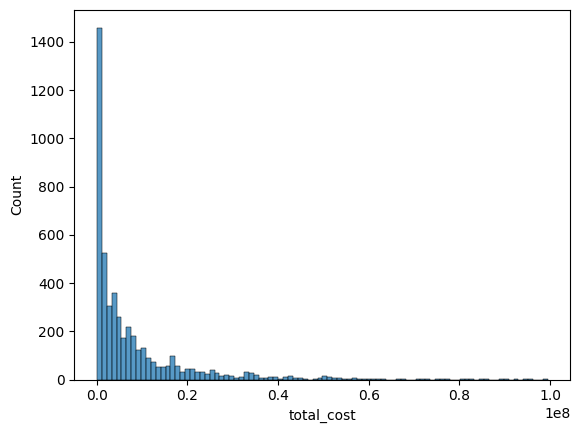

In [14]:
# histplot for target
sns.histplot(df['total_cost']);

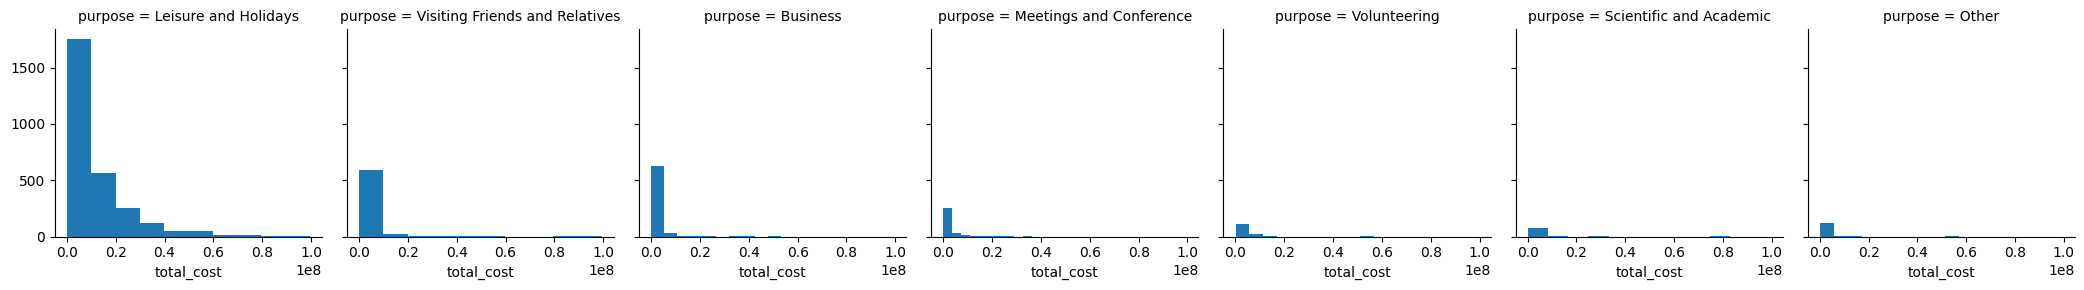

In [15]:
# Who is spending most money? Purpose

grid = sns.FacetGrid(data=df, col='purpose')
grid.map(plt.hist, 'total_cost')
plt.show()

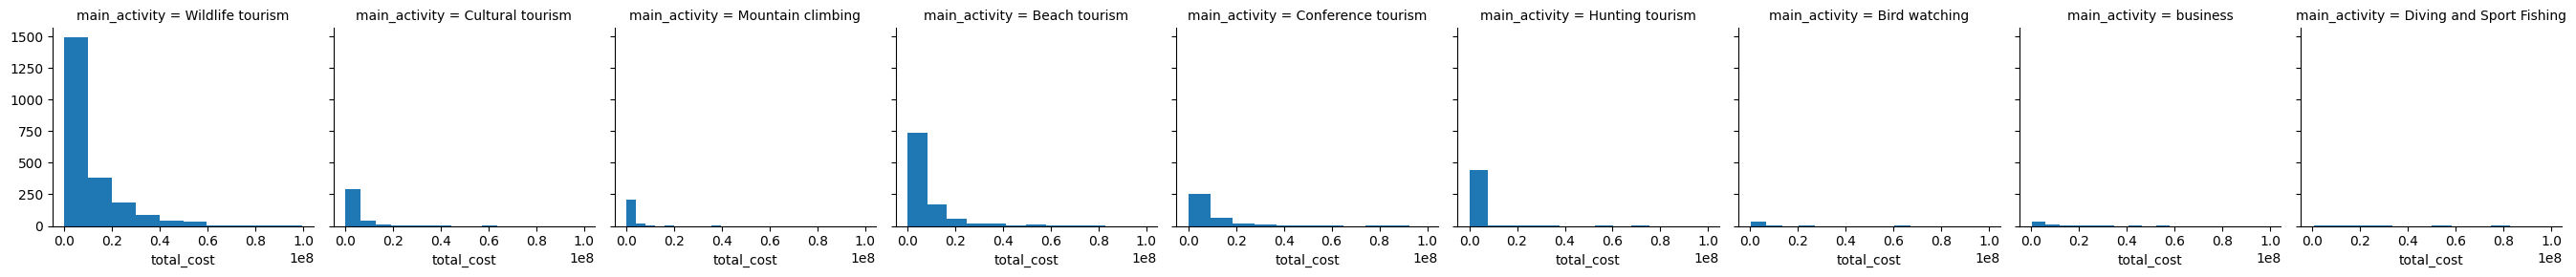

In [16]:
# Who is spending most money? Main activity

grid = sns.FacetGrid(data=df, col='main_activity')
grid.map(plt.hist, 'total_cost')
plt.show()

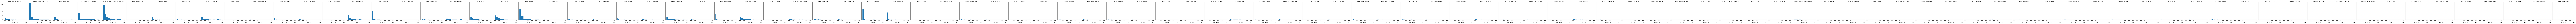

In [17]:
# Who is spending most money? Country
grid = sns.FacetGrid(data=df, col='country')
grid.map(plt.hist, 'total_cost')
plt.show()
  # ----> tooo many countrys to plot in that way

In [18]:
# What are the different countrys people are coming from?
df.country.nunique()
df.country.value_counts()


country
UNITED STATES OF AMERICA    695
UNITED KINGDOM              533
ITALY                       393
FRANCE                      280
ZIMBABWE                    274
                           ... 
NIGER                         1
MYANMAR                       1
DOMINICA                      1
TUNISIA                       1
ESTONIA                       1
Name: count, Length: 105, dtype: int64

<Axes: ylabel='country'>

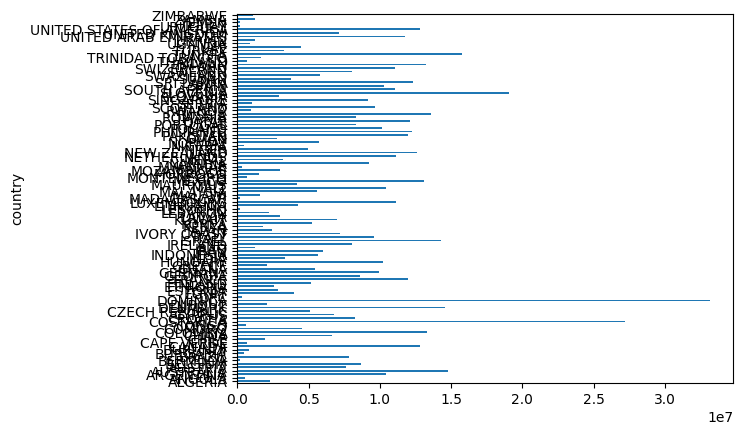

In [19]:
# Checking what spending per country on average
pd.set_option('display.max_rows', None)
df.groupby('country')['total_cost'].mean().sort_values(ascending=False)
df.groupby('country')['total_cost'].mean().plot(kind='barh')


## Remember for Data Cleaning: Domenica and Tunesia are the countries, where people spend most, but just 1 observation in data

<Axes: xlabel='age_group'>

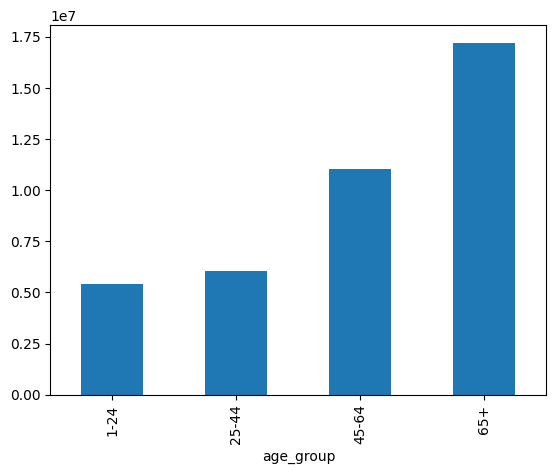

In [20]:

df.groupby('age_group')['total_cost'].mean().sort_values(ascending=False)
df.groupby('age_group')['total_cost'].mean().plot(kind='bar')

<Axes: ylabel='age_group,country'>

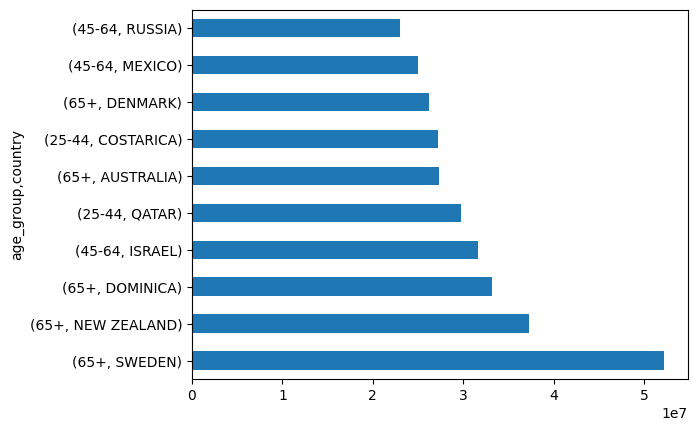

In [21]:
df.groupby(['age_group', 'country'])['total_cost'].mean().sort_values(ascending=False).head(10).plot(kind='barh')

In [22]:
df.loc[df['country'] == 'DOMINICA']



ID   country age_group          travel_with  total_female   
381  tour_1467  DOMINICA       65+  Spouse and Children           2.0  \

     total_male               purpose     main_activity   
381         2.0  Leisure and Holidays  Wildlife tourism  \

                      info_source tour_arrangement  ... package_transport_tz   
381  Travel, agent, tour operator     Package Tour  ...                  Yes  \

    package_sightseeing package_guided_tour package_insurance night_mainland   
381                 Yes                  No               Yes            5.0  \

    night_zanzibar payment_mode  first_trip_tz  most_impressing  total_cost  
381            0.0  Credit Card            Yes  Friendly People  33150000.0  

[1 rows x 23 columns]

True observation, no outlier, do not remove <br>
To do: Create an other colum with total number of people

### Data Cleaning

In [23]:
#df[(df['total_male' == 0]) & (df['total_female'] == 0)]
df.query('total_male == 0 and total_female == 0')

ID                   country age_group          travel_with   
170   tour_1205  UNITED STATES OF AMERICA     25-44               Spouse  \
705   tour_1867                   HUNGARY     45-64  Spouse and Children   
706   tour_1869  UNITED STATES OF AMERICA     45-64                  NaN   
727   tour_1893  UNITED STATES OF AMERICA     45-64  Spouse and Children   
1154  tour_2414                   GERMANY     45-64    Friends/Relatives   
1670  tour_3040                  ZIMBABWE      1-24                Alone   
2243  tour_3730  UNITED STATES OF AMERICA       65+               Spouse   
2335  tour_3840                     SPAIN     25-44                Alone   
2430   tour_396                 AUSTRALIA      1-24                Alone   
2661   tour_425                     SPAIN     45-64    Friends/Relatives   
3224  tour_4901                    FRANCE     25-44    Friends/Relatives   
3236  tour_4915                 AUSTRALIA       65+    Friends/Relatives   
3814  tour_5631            UNITED KINGDOM     25-44    Friends/Relatives   
3864  tour_5689                    UGANDA     25-44                Alone   
4586   tour_727                    CANADA      1-24    Friends/Relatives   

      total_female  total_male                         purpose   
170            0.0         0.0            Leisure and Holidays  \
705            0.0         0.0            Leisure and Holidays   
706            0.0         0.0            Leisure and Holidays   
727            0.0         0.0            Leisure and Holidays   
1154           0.0         0.0            Leisure and Holidays   
1670           0.0         0.0                        Business   
2243           0.0         0.0            Leisure and Holidays   
2335           0.0         0.0            Leisure and Holidays   
2430           0.0         0.0            Leisure and Holidays   
2661           0.0         0.0            Leisure and Holidays   
3224           0.0         0.0            Leisure and Holidays   
3236           0.0         0.0            Leisure and Holidays   
3814           0.0         0.0            Leisure and Holidays   
3864           0.0         0.0  Visiting Friends and Relatives   
4586           0.0         0.0                    Volunteering   

         main_activity                     info_source tour_arrangement  ...   
170   Wildlife tourism                  Radio, TV, Web     Package Tour  ...  \
705   Wildlife tourism    Travel, agent, tour operator     Package Tour  ...   
706   Wildlife tourism    Travel, agent, tour operator     Package Tour  ...   
727   Wildlife tourism              Friends, relatives      Independent  ...   
1154     Beach tourism  Newspaper, magazines,brochures     Package Tour  ...   
1670     Beach tourism  Newspaper, magazines,brochures      Independent  ...   
2243  Wildlife tourism    Travel, agent, tour operator     Package Tour  ...   
2335  Wildlife tourism    Travel, agent, tour operator     Package Tour  ...   
2430   Hunting tourism    Travel, agent, tour operator      Independent  ...   
2661  Wildlife tourism              Friends, relatives     Package Tour  ...   
3224  Wildlife tourism    Travel, agent, tour operator     Package Tour  ...   
3236  Wildlife tourism    Travel, agent, tour operator     Package Tour  ...   
3814  Cultural tourism              Friends, relatives      Independent  ...   
3864   Hunting tourism              Friends, relatives      Independent  ...   
4586  Wildlife tourism              Friends, relatives     Package Tour  ...   

     package_transport_tz package_sightseeing package_guided_tour   
170                   Yes                  No                 Yes  \
705                   Yes                 Yes                 Yes   
706                   Yes                  No                 Yes   
727                    No                  No                  No   
1154                  Yes                  No                  No   
1670                   No                  N

they said, they travelled with relatives but there are zeros inside total_male and total_female, so they didn't answered correctly

In [24]:
#create a new data frame for data cleaning
df_clean = df

In [25]:
#have a closer look at the NaN values of total_male
df_clean[df_clean['total_male'].isna()]

ID                   country age_group        travel_with   
1017  tour_2246  UNITED STATES OF AMERICA     45-64  Friends/Relatives  \
1473  tour_2810                     SPAIN     45-64  Friends/Relatives   
2449  tour_3980              SOUTH AFRICA     25-44  Friends/Relatives   
2494  tour_4031                    FRANCE     25-44                NaN   
3984  tour_5838                     CHINA     25-44  Friends/Relatives   

      total_female  total_male                  purpose       main_activity   
1017           4.0         NaN     Leisure and Holidays    Wildlife tourism  \
1473           7.0         NaN                    Other     Hunting tourism   
2449           0.0         NaN  Meetings and Conference    Wildlife tourism   
2494           0.0         NaN     Leisure and Holidays  Conference tourism   
3984          10.0         NaN     Leisure and Holidays    Wildlife tourism   

                         info_source tour_arrangement  ...   
1017    Travel, agent, tour operator     Package Tour  ...  \
1473    Travel, agent, tour operator     Package Tour  ...   
2449  Newspaper, magazines,brochures      Independent  ...   
2494                  Radio, TV, Web     Package Tour  ...   
3984    Travel, agent, tour operator     Package Tour  ...   

     package_transport_tz package_sightseeing package_guided_tour   
1017                  Yes                 Yes                 Yes  \
1473                  Yes                  No                  No   
2449                   No                  No                  No   
2494                  Yes                 Yes                 Yes   
3984                  Yes                 Yes                 Yes   

     package_insurance night_mainland night_zanzibar payment_mode   
1017                No           19.0            0.0         Cash  \
1473               Yes           11.0            0.0         Cash   
2449                No            4.0            0.0  Credit Card   
2494               Yes            6.0            0.0         Cash   
3984               Yes            4.0            2.0         Cash   

      first_trip_tz                       most_impressing  total_cost  
1017            Yes                                   NaN   7293000.0  
1473             No  Wonderful Country, Landscape, Nature  56960183.0  
2449            Yes                       Friendly People   3978000.0  
2494            Yes                  Excellent Experience   4309500.0  
3984            Yes                              Wildlife  89505000.0  

[5 rows x 23 columns]

In [26]:
#have a closer look at the NaN values of total_female
df_clean[df_clean['total_female'].isna()]

ID country age_group        travel_with  total_female   
490   tour_1604  FRANCE     25-44  Friends/Relatives           NaN  \
545   tour_1678   ITALY      1-24  Friends/Relatives           NaN   
1261  tour_2547  FRANCE     25-44  Friends/Relatives           NaN   

      total_male               purpose     main_activity   
490          1.0  Leisure and Holidays  Wildlife tourism  \
545          4.0          Volunteering  Wildlife tourism   
1261         1.0  Leisure and Holidays  Wildlife tourism   

                         info_source tour_arrangement  ...   
490     Travel, agent, tour operator     Package Tour  ...  \
545               Friends, relatives      Independent  ...   
1261  Newspaper, magazines,brochures     Package Tour  ...   

     package_transport_tz package_sightseeing package_guided_tour   
490                   Yes                 Yes                 Yes  \
545                    No                  No                  No   
1261                  Yes                 Yes                 Yes   

     package_insurance night_mainland night_zanzibar payment_mode   
490                Yes            9.0            5.0         Cash  \
545                 No           15.0            0.0         Cash   
1261               Yes            7.0            7.0         Cash   

      first_trip_tz                       most_impressing total_cost  
490             Yes                           No comments   313000.0  
545             Yes                           No comments  9077320.0  
1261            Yes  Wonderful Country, Landscape, Nature   324300.0  

[3 rows x 23 columns]

In [27]:
#replacing NaN values in total_male and total_female with 0
df_clean['total_male'] = df_clean['total_male'].fillna(0)
df_clean['total_female'] = df_clean['total_female'].fillna(0)

In [28]:
#create a new column to find out how many people belong to one observation

df_clean['total_visitors']=df_clean['total_female']+df_clean['total_male'] 
df_clean.head(10) 
#df_clean = df.drop(['total_female', 'total_male'], axis=1)


ID                   country age_group        travel_with   
0     tour_0                SWIZERLAND     45-64  Friends/Relatives  \
1    tour_10            UNITED KINGDOM     25-44                NaN   
2  tour_1000            UNITED KINGDOM     25-44              Alone   
3  tour_1002            UNITED KINGDOM     25-44             Spouse   
4  tour_1004                     CHINA      1-24                NaN   
5  tour_1005            UNITED KINGDOM     25-44                NaN   
6  tour_1007              SOUTH AFRICA     45-64              Alone   
7  tour_1008  UNITED STATES OF AMERICA     45-64  Friends/Relatives   
8   tour_101                   NIGERIA     25-44              Alone   
9  tour_1011                     INDIA     25-44              Alone   

   total_female  total_male                         purpose   
0           1.0         1.0            Leisure and Holidays  \
1           1.0         0.0            Leisure and Holidays   
2           0.0         1.0  Visiting Friends and Relatives   
3           1.0         1.0            Leisure and Holidays   
4           1.0         0.0            Leisure and Holidays   
5           0.0         1.0            Leisure and Holidays   
6           0.0         1.0                        Business   
7           1.0         1.0            Leisure and Holidays   
8           0.0         1.0            Leisure and Holidays   
9           1.0         0.0                        Business   

       main_activity                   info_source tour_arrangement  ...   
0   Wildlife tourism            Friends, relatives      Independent  ...  \
1   Cultural tourism                        others      Independent  ...   
2   Cultural tourism            Friends, relatives      Independent  ...   
3   Wildlife tourism  Travel, agent, tour operator     Package Tour  ...   
4   Wildlife tourism  Travel, agent, tour operator      Independent  ...   
5   Wildlife tourism  Travel, agent, tour operator     Package Tour  ...   
6  Mountain climbing            Friends, relatives      Independent  ...   
7   Wildlife tourism  Travel, agent, tour operator     Package Tour  ...   
8   Cultural tourism  Travel, agent, tour operator      Independent  ...   
9   Wildlife tourism  Travel, agent, tour operator      Independent  ...   

  package_sightseeing package_guided_tour package_insurance night_mainland   
0                  No                  No                No           13.0  \
1                  No                  No                No           14.0   
2                  No                  No                No            1.0   
3                 Yes                 Yes                No           11.0   
4                  No                  No                No            7.0   
5                 Yes                 Yes                No            9.0   
6                  No                  No                No            9.0   
7                 Yes                 Yes               Yes           10.0   
8                  No                  No                No            4.0   
9                  No                  No                No            5.0   

  night_zanzibar payment_mode first_trip_tz   
0            0.0         Cash            No  \
1            7.0         Cash           Yes   
2           31.0         Cash            No   
3            0.0         Cash           Yes   
4            4.0         Cash           Yes   
5            3.0         Cash           Yes   
6            0.0         Cash           Yes   
7            3.0         Cash           Yes   
8            0.0         Cash           Yes   
9            0.0  Credit Card           Yes   

                        most_impressing  total_cost total_visitors  
0                       Friendly People    674602.5            2.0  
1  Wonderful Country, Landscape, Nature   3214906.5            1.0  
2                  Excellent Experience   3315000.0            1.0  
3                       Friendly People   77

In [29]:
#show the NaN values for total_visitors
df_clean.total_visitors.isnull().sum()
#df_clean[df_clean['total_visitors']].isnull()
df_clean[df_clean['total_visitors'].isna()]
df_clean[df_clean['total_visitors'] == 0]

df_clean['total_visitors'] = df_clean['total_visitors'].replace(0,1)
df_clean[df_clean['total_visitors'] == 0]

Empty DataFrame
Columns: [ID, country, age_group, travel_with, total_female, total_male, purpose, main_activity, info_source, tour_arrangement, package_transport_int, package_accomodation, package_food, package_transport_tz, package_sightseeing, package_guided_tour, package_insurance, night_mainland, night_zanzibar, payment_mode, first_trip_tz, most_impressing, total_cost, total_visitors]
Index: []

[0 rows x 24 columns]

In [30]:
df_clean.isnull().sum()
(df_clean['package_sightseeing'] == 0).all()


False

In [31]:
df_clean.head()

ID         country age_group        travel_with  total_female   
0     tour_0      SWIZERLAND     45-64  Friends/Relatives           1.0  \
1    tour_10  UNITED KINGDOM     25-44                NaN           1.0   
2  tour_1000  UNITED KINGDOM     25-44              Alone           0.0   
3  tour_1002  UNITED KINGDOM     25-44             Spouse           1.0   
4  tour_1004           CHINA      1-24                NaN           1.0   

   total_male                         purpose     main_activity   
0         1.0            Leisure and Holidays  Wildlife tourism  \
1         0.0            Leisure and Holidays  Cultural tourism   
2         1.0  Visiting Friends and Relatives  Cultural tourism   
3         1.0            Leisure and Holidays  Wildlife tourism   
4         0.0            Leisure and Holidays  Wildlife tourism   

                    info_source tour_arrangement  ... package_sightseeing   
0            Friends, relatives      Independent  ...                  No  \
1                        others      Independent  ...                  No   
2            Friends, relatives      Independent  ...                  No   
3  Travel, agent, tour operator     Package Tour  ...                 Yes   
4  Travel, agent, tour operator      Independent  ...                  No   

  package_guided_tour package_insurance night_mainland night_zanzibar   
0                  No                No           13.0            0.0  \
1                  No                No           14.0            7.0   
2                  No                No            1.0           31.0   
3                 Yes                No           11.0            0.0   
4                  No                No            7.0            4.0   

  payment_mode first_trip_tz                       most_impressing   
0         Cash            No                       Friendly People  \
1         Cash           Yes  Wonderful Country, Landscape, Nature   
2         Cash            No                  Excellent Experience   
3         Cash           Yes                       Friendly People   
4         Cash           Yes                           No comments   

   total_cost total_visitors  
0    674602.5            2.0  
1   3214906.5            1.0  
2   3315000.0            1.0  
3   7790250.0            2.0  
4   1657500.0            1.0  

[5 rows x 24 columns]

In [32]:
df_clean.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost', 'total_visitors'],
      dtype='object')

In [33]:
df_clean.head()

ID         country age_group        travel_with  total_female   
0     tour_0      SWIZERLAND     45-64  Friends/Relatives           1.0  \
1    tour_10  UNITED KINGDOM     25-44                NaN           1.0   
2  tour_1000  UNITED KINGDOM     25-44              Alone           0.0   
3  tour_1002  UNITED KINGDOM     25-44             Spouse           1.0   
4  tour_1004           CHINA      1-24                NaN           1.0   

   total_male                         purpose     main_activity   
0         1.0            Leisure and Holidays  Wildlife tourism  \
1         0.0            Leisure and Holidays  Cultural tourism   
2         1.0  Visiting Friends and Relatives  Cultural tourism   
3         1.0            Leisure and Holidays  Wildlife tourism   
4         0.0            Leisure and Holidays  Wildlife tourism   

                    info_source tour_arrangement  ... package_sightseeing   
0            Friends, relatives      Independent  ...                  No  \
1                        others      Independent  ...                  No   
2            Friends, relatives      Independent  ...                  No   
3  Travel, agent, tour operator     Package Tour  ...                 Yes   
4  Travel, agent, tour operator      Independent  ...                  No   

  package_guided_tour package_insurance night_mainland night_zanzibar   
0                  No                No           13.0            0.0  \
1                  No                No           14.0            7.0   
2                  No                No            1.0           31.0   
3                 Yes                No           11.0            0.0   
4                  No                No            7.0            4.0   

  payment_mode first_trip_tz                       most_impressing   
0         Cash            No                       Friendly People  \
1         Cash           Yes  Wonderful Country, Landscape, Nature   
2         Cash            No                  Excellent Experience   
3         Cash           Yes                       Friendly People   
4         Cash           Yes                           No comments   

   total_cost total_visitors  
0    674602.5            2.0  
1   3214906.5            1.0  
2   3315000.0            1.0  
3   7790250.0            2.0  
4   1657500.0            1.0  

[5 rows x 24 columns]

In [34]:
#create a list of all the columns which are with categories "yes" and "no" and replace it with 0 and 1
column_list = ['package_transport_int','package_accomodation','package_food', 'package_sightseeing','package_guided_tour', 'package_insurance', 'first_trip_tz', 'package_transport_tz']
df_clean[column_list] = df_clean[column_list].replace('Yes', 1)
df_clean[column_list] = df_clean[column_list].replace('No', 0)
df_clean.head()

ID         country age_group        travel_with  total_female   
0     tour_0      SWIZERLAND     45-64  Friends/Relatives           1.0  \
1    tour_10  UNITED KINGDOM     25-44                NaN           1.0   
2  tour_1000  UNITED KINGDOM     25-44              Alone           0.0   
3  tour_1002  UNITED KINGDOM     25-44             Spouse           1.0   
4  tour_1004           CHINA      1-24                NaN           1.0   

   total_male                         purpose     main_activity   
0         1.0            Leisure and Holidays  Wildlife tourism  \
1         0.0            Leisure and Holidays  Cultural tourism   
2         1.0  Visiting Friends and Relatives  Cultural tourism   
3         1.0            Leisure and Holidays  Wildlife tourism   
4         0.0            Leisure and Holidays  Wildlife tourism   

                    info_source tour_arrangement  ...  package_sightseeing   
0            Friends, relatives      Independent  ...                    0  \
1                        others      Independent  ...                    0   
2            Friends, relatives      Independent  ...                    0   
3  Travel, agent, tour operator     Package Tour  ...                    1   
4  Travel, agent, tour operator      Independent  ...                    0   

   package_guided_tour  package_insurance  night_mainland  night_zanzibar   
0                    0                  0            13.0             0.0  \
1                    0                  0            14.0             7.0   
2                    0                  0             1.0            31.0   
3                    1                  0            11.0             0.0   
4                    0                  0             7.0             4.0   

   payment_mode  first_trip_tz                       most_impressing   
0          Cash              0                       Friendly People  \
1          Cash              1  Wonderful Country, Landscape, Nature   
2          Cash              0                  Excellent Experience   
3          Cash              1                       Friendly People   
4          Cash              1                           No comments   

   total_cost total_visitors  
0    674602.5            2.0  
1   3214906.5            1.0  
2   3315000.0            1.0  
3   7790250.0            2.0  
4   1657500.0            1.0  

[5 rows x 24 columns]

In [35]:
df_clean.info_source.unique()

array(['Friends, relatives', 'others', 'Travel, agent, tour operator',
       'Radio, TV, Web', 'Tanzania Mission Abroad', 'inflight magazines',
       'Newspaper, magazines,brochures', 'Trade fair'], dtype=object)

In [36]:
#Find the unique values for age_group

df_clean.age_group.unique()

array(['45-64', '25-44', '1-24', '65+'], dtype=object)

In [37]:
df_clean[['travel_with','most_impressing']] = df_clean[['travel_with','most_impressing']].fillna('Not_mentioned')
df_clean.head()

ID         country age_group        travel_with  total_female   
0     tour_0      SWIZERLAND     45-64  Friends/Relatives           1.0  \
1    tour_10  UNITED KINGDOM     25-44      Not_mentioned           1.0   
2  tour_1000  UNITED KINGDOM     25-44              Alone           0.0   
3  tour_1002  UNITED KINGDOM     25-44             Spouse           1.0   
4  tour_1004           CHINA      1-24      Not_mentioned           1.0   

   total_male                         purpose     main_activity   
0         1.0            Leisure and Holidays  Wildlife tourism  \
1         0.0            Leisure and Holidays  Cultural tourism   
2         1.0  Visiting Friends and Relatives  Cultural tourism   
3         1.0            Leisure and Holidays  Wildlife tourism   
4         0.0            Leisure and Holidays  Wildlife tourism   

                    info_source tour_arrangement  ...  package_sightseeing   
0            Friends, relatives      Independent  ...                    0  \
1                        others      Independent  ...                    0   
2            Friends, relatives      Independent  ...                    0   
3  Travel, agent, tour operator     Package Tour  ...                    1   
4  Travel, agent, tour operator      Independent  ...                    0   

   package_guided_tour  package_insurance  night_mainland  night_zanzibar   
0                    0                  0            13.0             0.0  \
1                    0                  0            14.0             7.0   
2                    0                  0             1.0            31.0   
3                    1                  0            11.0             0.0   
4                    0                  0             7.0             4.0   

   payment_mode  first_trip_tz                       most_impressing   
0          Cash              0                       Friendly People  \
1          Cash              1  Wonderful Country, Landscape, Nature   
2          Cash              0                  Excellent Experience   
3          Cash              1                       Friendly People   
4          Cash              1                           No comments   

   total_cost total_visitors  
0    674602.5            2.0  
1   3214906.5            1.0  
2   3315000.0            1.0  
3   7790250.0            2.0  
4   1657500.0            1.0  

[5 rows x 24 columns]

In [38]:

#Change the columns (object) into categorical

category_list = ['age_group', 'travel_with', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'payment_mode', 'most_impressing', 'country']

df_clean[category_list]= df_clean[category_list].astype('category')

df_clean.dtypes





ID                         object
country                  category
age_group                category
travel_with              category
total_female              float64
total_male                float64
purpose                  category
main_activity            category
info_source              category
tour_arrangement         category
package_transport_int       int64
package_accomodation        int64
package_food                int64
package_transport_tz        int64
package_sightseeing         int64
package_guided_tour         int64
package_insurance           int64
night_mainland            float64
night_zanzibar            float64
payment_mode             category
first_trip_tz               int64
most_impressing          category
total_cost                float64
total_visitors            float64
dtype: object

In [39]:
#Check for duplicates

df_clean.duplicated().sum()

0

In [40]:
#Check for null values

df_clean.isnull().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
total_visitors           0
dtype: int64

In [41]:
df_clean = df_clean.drop('ID', axis=1)


### Feature Engineering
Created a new column to convert the total cost to US dollars

In [42]:
#Converting the TZS to US Dollars

exchange_rate =  0.00041
df_clean['total_cost_usd'] = (df_clean['total_cost']* exchange_rate).round(2)

df_clean.head(10)

country age_group        travel_with  total_female   
0                SWIZERLAND     45-64  Friends/Relatives           1.0  \
1            UNITED KINGDOM     25-44      Not_mentioned           1.0   
2            UNITED KINGDOM     25-44              Alone           0.0   
3            UNITED KINGDOM     25-44             Spouse           1.0   
4                     CHINA      1-24      Not_mentioned           1.0   
5            UNITED KINGDOM     25-44      Not_mentioned           0.0   
6              SOUTH AFRICA     45-64              Alone           0.0   
7  UNITED STATES OF AMERICA     45-64  Friends/Relatives           1.0   
8                   NIGERIA     25-44              Alone           0.0   
9                     INDIA     25-44              Alone           1.0   

   total_male                         purpose      main_activity   
0         1.0            Leisure and Holidays   Wildlife tourism  \
1         0.0            Leisure and Holidays   Cultural tourism   
2         1.0  Visiting Friends and Relatives   Cultural tourism   
3         1.0            Leisure and Holidays   Wildlife tourism   
4         0.0            Leisure and Holidays   Wildlife tourism   
5         1.0            Leisure and Holidays   Wildlife tourism   
6         1.0                        Business  Mountain climbing   
7         1.0            Leisure and Holidays   Wildlife tourism   
8         1.0            Leisure and Holidays   Cultural tourism   
9         0.0                        Business   Wildlife tourism   

                    info_source tour_arrangement  package_transport_int  ...   
0            Friends, relatives      Independent                      0  ...  \
1                        others      Independent                      0  ...   
2            Friends, relatives      Independent                      0  ...   
3  Travel, agent, tour operator     Package Tour                      0  ...   
4  Travel, agent, tour operator      Independent                      0  ...   
5  Travel, agent, tour operator     Package Tour                      0  ...   
6            Friends, relatives      Independent                      0  ...   
7  Travel, agent, tour operator     Package Tour                      1  ...   
8  Travel, agent, tour operator      Independent                      0  ...   
9  Travel, agent, tour operator      Independent                      0  ...   

   package_guided_tour  package_insurance  night_mainland  night_zanzibar   
0                    0                  0            13.0             0.0  \
1                    0                  0            14.0             7.0   
2                    0                  0             1.0            31.0   
3                    1                  0            11.0             0.0   
4                    0                  0             7.0             4.0   
5                    1                  0             9.0             3.0   
6                    0                  0             9.0             0.0   
7                    1                  1            10.0             3.0   
8                    0                  0             4.0             0.0   
9                    0                  0             5.0             0.0   

   payment_mode  first_trip_tz                       most_impressing   
0          Cash              0                       Friendly People  \
1          Cash              1  Wonderful Country, Landscape, Nature   
2          Cash              0                  Excellent Experience   
3          Cash              1                       Friendly People   
4          Cash              1                           No comments   
5          Cash              1                              Wildlife   
6          Cash              1                       Friendly People   
7          Cash              1                       Friendly People   
8          Cash              1                         Not_mentioned   
9   Cre

In [43]:
# Create another column to find the cost per person
df_clean['cost_per_person'] = df_clean['total_cost_usd']/df['total_visitors']
#drop the total cost because we have now total cost in USD
df_clean = df_clean.drop('total_cost', axis=1)
df_clean.head(5)


country age_group        travel_with  total_female  total_male   
0      SWIZERLAND     45-64  Friends/Relatives           1.0         1.0  \
1  UNITED KINGDOM     25-44      Not_mentioned           1.0         0.0   
2  UNITED KINGDOM     25-44              Alone           0.0         1.0   
3  UNITED KINGDOM     25-44             Spouse           1.0         1.0   
4           CHINA      1-24      Not_mentioned           1.0         0.0   

                          purpose     main_activity   
0            Leisure and Holidays  Wildlife tourism  \
1            Leisure and Holidays  Cultural tourism   
2  Visiting Friends and Relatives  Cultural tourism   
3            Leisure and Holidays  Wildlife tourism   
4            Leisure and Holidays  Wildlife tourism   

                    info_source tour_arrangement  package_transport_int  ...   
0            Friends, relatives      Independent                      0  ...  \
1                        others      Independent                      0  ...   
2            Friends, relatives      Independent                      0  ...   
3  Travel, agent, tour operator     Package Tour                      0  ...   
4  Travel, agent, tour operator      Independent                      0  ...   

   package_guided_tour  package_insurance  night_mainland  night_zanzibar   
0                    0                  0            13.0             0.0  \
1                    0                  0            14.0             7.0   
2                    0                  0             1.0            31.0   
3                    1                  0            11.0             0.0   
4                    0                  0             7.0             4.0   

   payment_mode  first_trip_tz                       most_impressing   
0          Cash              0                       Friendly People  \
1          Cash              1  Wonderful Country, Landscape, Nature   
2          Cash              0                  Excellent Experience   
3          Cash              1                       Friendly People   
4          Cash              1                           No comments   

   total_visitors total_cost_usd  cost_per_person  
0             2.0         276.59          138.295  
1             1.0        1318.11         1318.110  
2             1.0        1359.15         1359.150  
3             2.0        3194.00         1597.000  
4             1.0         679.58          679.580  

[5 rows x 24 columns]

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   country                4809 non-null   category
 1   age_group              4809 non-null   category
 2   travel_with            4809 non-null   category
 3   total_female           4809 non-null   float64 
 4   total_male             4809 non-null   float64 
 5   purpose                4809 non-null   category
 6   main_activity          4809 non-null   category
 7   info_source            4809 non-null   category
 8   tour_arrangement       4809 non-null   category
 9   package_transport_int  4809 non-null   int64   
 10  package_accomodation   4809 non-null   int64   
 11  package_food           4809 non-null   int64   
 12  package_transport_tz   4809 non-null   int64   
 13  package_sightseeing    4809 non-null   int64   
 14  package_guided_tour    4809 non-null   i

to do:
-- go on with data cleaning (change categorical variables into numerical (main activity and tour arrangement, purpose... ))<br>
-- do EDA<br>

-- check the main activity why they are there. and what is the most famous activity (is it wildlife)<br>
--to create a binary case for categorical algo to divide the spenders into high and low spenders (clustering)<br>
--think about if we want to keep the total_male and total_female columns to separate between gender or to use the new column total_visitors;
--if we have time left, we can change zero values in total_male and total_female

In [45]:
#drop the Id column
#df_clean = df_clean.drop('ID', axis=1)
df_clean.head(5)

country age_group        travel_with  total_female  total_male   
0      SWIZERLAND     45-64  Friends/Relatives           1.0         1.0  \
1  UNITED KINGDOM     25-44      Not_mentioned           1.0         0.0   
2  UNITED KINGDOM     25-44              Alone           0.0         1.0   
3  UNITED KINGDOM     25-44             Spouse           1.0         1.0   
4           CHINA      1-24      Not_mentioned           1.0         0.0   

                          purpose     main_activity   
0            Leisure and Holidays  Wildlife tourism  \
1            Leisure and Holidays  Cultural tourism   
2  Visiting Friends and Relatives  Cultural tourism   
3            Leisure and Holidays  Wildlife tourism   
4            Leisure and Holidays  Wildlife tourism   

                    info_source tour_arrangement  package_transport_int  ...   
0            Friends, relatives      Independent                      0  ...  \
1                        others      Independent                      0  ...   
2            Friends, relatives      Independent                      0  ...   
3  Travel, agent, tour operator     Package Tour                      0  ...   
4  Travel, agent, tour operator      Independent                      0  ...   

   package_guided_tour  package_insurance  night_mainland  night_zanzibar   
0                    0                  0            13.0             0.0  \
1                    0                  0            14.0             7.0   
2                    0                  0             1.0            31.0   
3                    1                  0            11.0             0.0   
4                    0                  0             7.0             4.0   

   payment_mode  first_trip_tz                       most_impressing   
0          Cash              0                       Friendly People  \
1          Cash              1  Wonderful Country, Landscape, Nature   
2          Cash              0                  Excellent Experience   
3          Cash              1                       Friendly People   
4          Cash              1                           No comments   

   total_visitors total_cost_usd  cost_per_person  
0             2.0         276.59          138.295  
1             1.0        1318.11         1318.110  
2             1.0        1359.15         1359.150  
3             2.0        3194.00         1597.000  
4             1.0         679.58          679.580  

[5 rows x 24 columns]

## EDA 

### Hypothesis for EDA
1- People spend more on Wildlife <br>
2- Total cost will be more if they are on independent tour <br>
3- The more numbers of night spent the more the cost <br>
 


#### looking for outliers 

<Axes: >

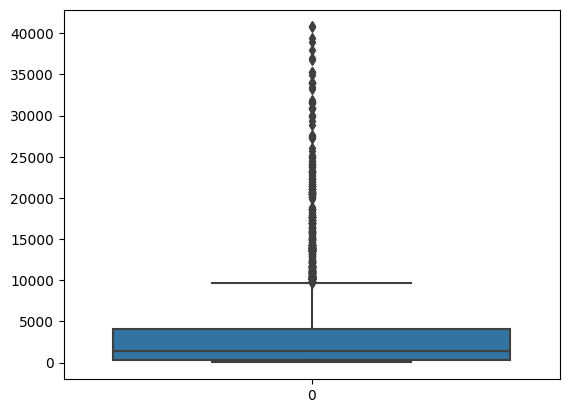

In [46]:
sns.boxplot(df_clean['total_cost_usd'])
#df_clean.boxplot(column=['Col1', 'Col2'], by='X',
 #                    layout=(2, 1))



In [47]:
#df_clean.total_cost_usd(where )

In [48]:
df_clean.total_cost_usd.describe()

count     4809.000000
mean      3326.899586
std       5012.210201
min         20.090000
25%        332.990000
50%       1393.130000
75%       4077.450000
max      40808.480000
Name: total_cost_usd, dtype: float64

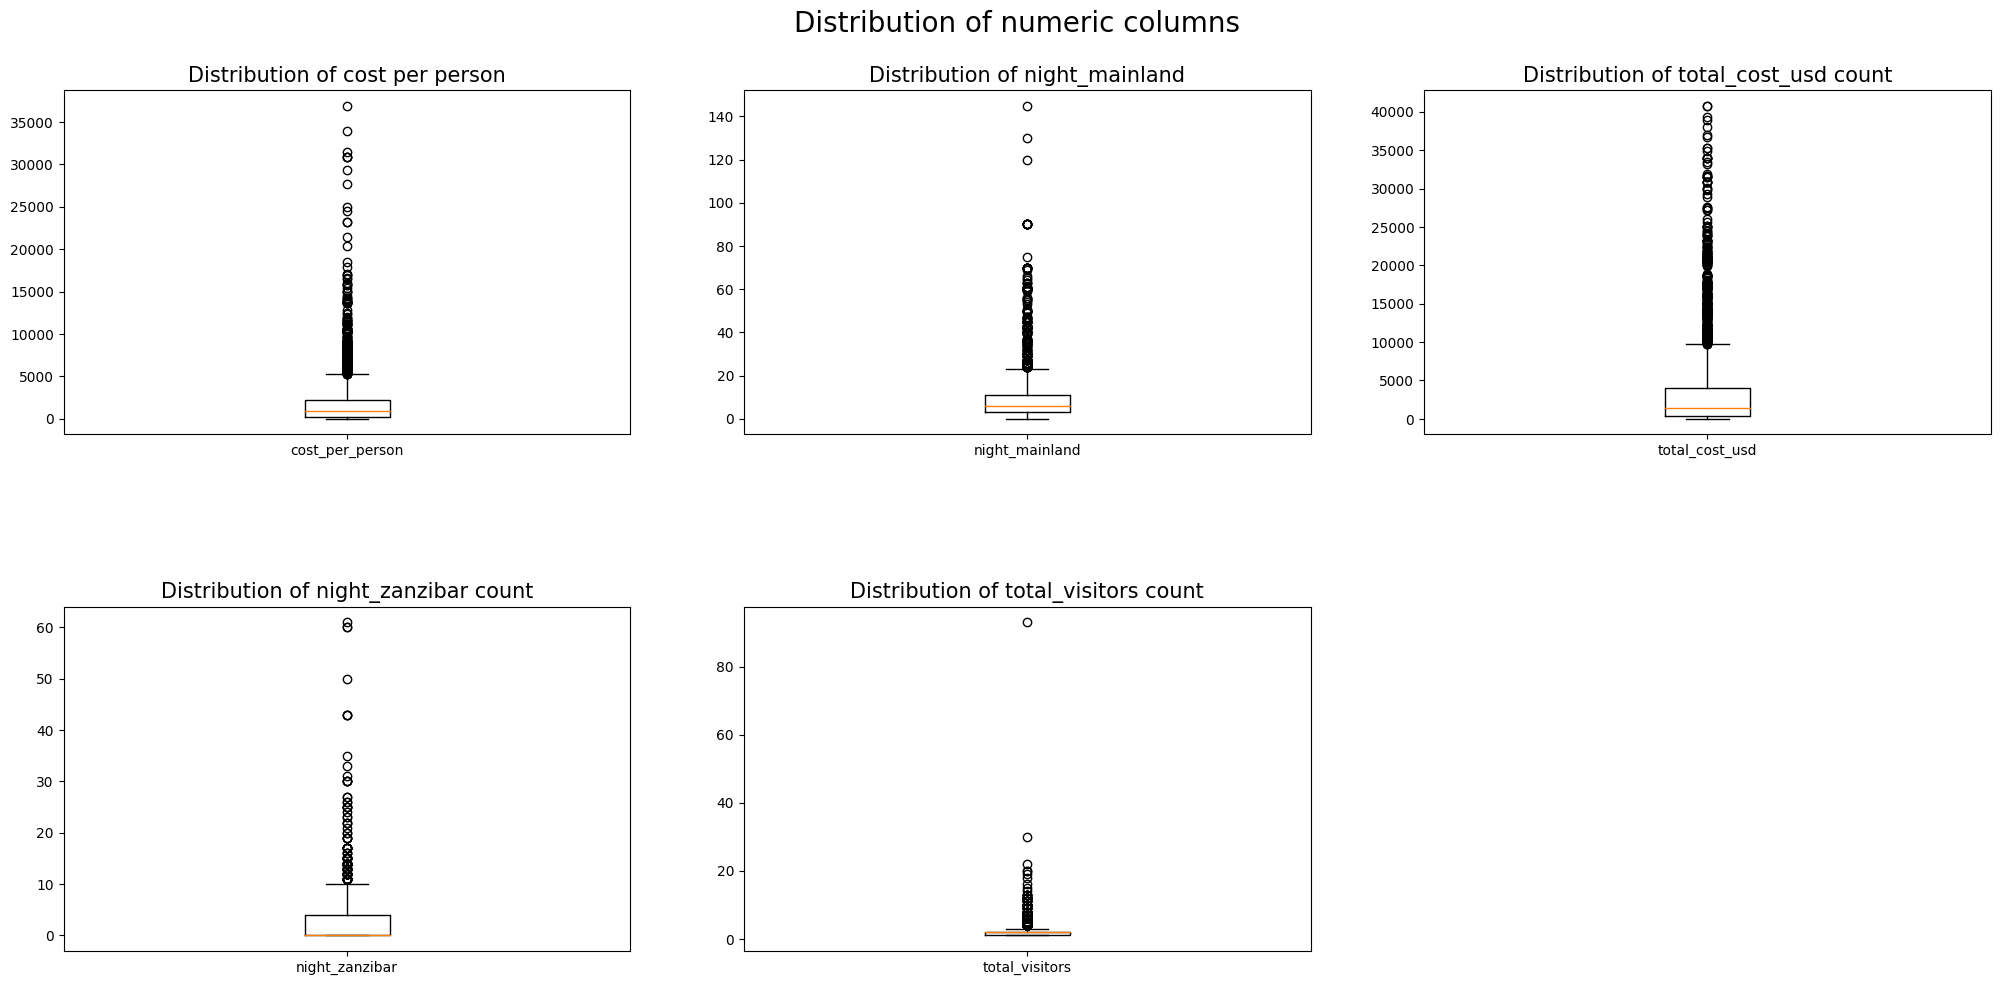

In [49]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].boxplot(x = df_clean['cost_per_person']) # creates boxplot for number of views
ax[0][0].set_xticklabels(labels=["cost_per_person"]) # sets the label for the ticks on the x-axis
ax[0][0].set_title("Distribution of cost per person", fontsize = 15); # sets title for subplot

ax[0][1].boxplot(x = df_clean['night_mainland'])
ax[0][1].set_xticklabels(labels=["night_mainland"])
ax[0][1].set_title("Distribution of night_mainland", fontsize = 15);

ax[0][2].boxplot(x = df_clean['total_cost_usd'])
ax[0][2].set_xticklabels(labels=["total_cost_usd"])
ax[0][2].set_title("Distribution of total_cost_usd count", fontsize = 15);

ax[1][0].boxplot(x = df_clean['night_zanzibar'])
ax[1][0].set_xticklabels(labels=["night_zanzibar"])
ax[1][0].set_title("Distribution of night_zanzibar count", fontsize = 15);
;
ax[1][1].boxplot(x = df_clean['total_visitors'])
ax[1][1].set_xticklabels(labels=["total_visitors"])
ax[1][1].set_title("Distribution of total_visitors count", fontsize = 15);

fig.delaxes(ax[1][2]);



#### Outliers
WE looked at the outliers in the column night_mainland. Looking at the rows closely we are assuming these are real values looking at the other columns. For total_visitors there was an observation for which the value was 90 but looking at the total cost and the cost per person it seems real too.

In [50]:
pd.set_option('display.max_columns', 60)
df_clean.query("night_mainland >= 80")

country age_group          travel_with  total_female   
71              UNITED KINGDOM     45-64                Alone           1.0  \
89                 NETHERLANDS     25-44  Spouse and Children           2.0   
893                     FRANCE     25-44        Not_mentioned           1.0   
1005                 MAURITIUS     25-44                Alone           0.0   
1126                   GERMANY      1-24    Friends/Relatives           3.0   
1548  UNITED STATES OF AMERICA      1-24        Not_mentioned           1.0   
1893                     KENYA     45-64                Alone           1.0   
1932                      OMAN     25-44        Not_mentioned           0.0   
2518                    UGANDA       65+                Alone           1.0   
2772               NETHERLANDS      1-24    Friends/Relatives           0.0   
4363                     INDIA      1-24                Alone           0.0   
4499            UNITED KINGDOM     25-44                Alone           0.0   

      total_male                         purpose      main_activity   
71           0.0  Visiting Friends and Relatives      Beach tourism  \
89           2.0                           Other   Wildlife tourism   
893          0.0  Visiting Friends and Relatives   Wildlife tourism   
1005         1.0         Meetings and Conference   Wildlife tourism   
1126         0.0            Leisure and Holidays   Cultural tourism   
1548         0.0  Visiting Friends and Relatives   Cultural tourism   
1893         0.0                        Business   Wildlife tourism   
1932         1.0                        Business   Wildlife tourism   
2518         0.0         Meetings and Conference  Mountain climbing   
2772         2.0                    Volunteering   Wildlife tourism   
4363         1.0                        Business      Beach tourism   
4499         1.0  Visiting Friends and Relatives      Beach tourism   

                         info_source tour_arrangement  package_transport_int   
71                Friends, relatives      Independent                      0  \
89                Friends, relatives      Independent                      0   
893   Newspaper, magazines,brochures      Independent                      0   
1005    Travel, agent, tour operator     Package Tour                      0   
1126  Newspaper, magazines,brochures      Independent                      0   
1548                      Trade fair      Independent                      0   
1893                          others      Independent                      0   
1932              Friends, relatives      Independent                      0   
2518              Friends, relatives      Independent                      0   
2772  Newspaper, magazines,brochures      Independent                      0   
4363                      Trade fair      Independent                      0   
4499              Friends, relatives      Independent                      0   

      package_accomodation  package_food  package_transport_tz   
71                       0             0                     0  \
89                       0             0                     0   
893                      0             0                     0   
1005                     1             0                     0   
1126                     0             0                     0   
1548                     0             0                     0   
1893                     0             0                     0   
1932                     0             0                     0   
2518                     0             0                     0   
2772                     0             0                     0   
4363                     0             0                     0   
4499                     0             0                     0   

      package_sightseeing  package_guided_tour  package_insurance   
71                      0                    0                  0  \
89                      0        

In [51]:
df_clean.query("total_visitors >= 80")

country age_group travel_with  total_female  total_male   
2983   KENYA     25-44    Children          49.0        44.0  \

                   purpose     main_activity info_source tour_arrangement   
2983  Leisure and Holidays  Wildlife tourism      others      Independent  \

      package_transport_int  package_accomodation  package_food   
2983                      0                     0             0  \

      package_transport_tz  package_sightseeing  package_guided_tour   
2983                     0                    0                    0  \

      package_insurance  night_mainland  night_zanzibar payment_mode   
2983                  0             4.0             0.0         Cash  \

      first_trip_tz       most_impressing  total_visitors  total_cost_usd   
2983              1  Excellent Experience            93.0        10796.13  \

      cost_per_person  
2983       116.087419

In [52]:
df_clean.query("cost_per_person >= 20000")

country age_group        travel_with  total_female   
630   UNITED STATES OF AMERICA      1-24      Not_mentioned           0.0  \
826   UNITED STATES OF AMERICA      1-24              Alone           0.0   
944   UNITED STATES OF AMERICA       65+      Not_mentioned           0.0   
1154                   GERMANY     45-64  Friends/Relatives           0.0   
1200                   DENMARK      1-24  Friends/Relatives           1.0   
1753                    CANADA     45-64              Alone           0.0   
1924              SOUTH AFRICA     45-64      Not_mentioned           1.0   
2009                    SWEDEN       65+      Not_mentioned           0.0   
2433                   DENMARK      1-24              Alone           0.0   
2434                   DENMARK      1-24              Alone           0.0   
2826              SOUTH AFRICA     25-44  Friends/Relatives           1.0   
2890                    CANADA     25-44      Not_mentioned           1.0   
3527                     QATAR     25-44      Not_mentioned           1.0   
4059                   DENMARK      1-24              Alone           0.0   

      total_male                         purpose       main_activity   
630          1.0            Leisure and Holidays  Conference tourism  \
826          1.0                    Volunteering    Wildlife tourism   
944          1.0            Leisure and Holidays    Wildlife tourism   
1154         0.0            Leisure and Holidays       Beach tourism   
1200         0.0            Leisure and Holidays  Conference tourism   
1753         1.0  Visiting Friends and Relatives    Wildlife tourism   
1924         0.0            Leisure and Holidays    Wildlife tourism   
2009         1.0            Leisure and Holidays    Wildlife tourism   
2433         1.0            Leisure and Holidays     Hunting tourism   
2434         1.0            Leisure and Holidays  Conference tourism   
2826         1.0            Leisure and Holidays    Wildlife tourism   
2890         0.0  Visiting Friends and Relatives  Conference tourism   
3527         0.0            Leisure and Holidays    Wildlife tourism   
4059         1.0            Leisure and Holidays  Conference tourism   

                         info_source tour_arrangement  package_transport_int   
630     Travel, agent, tour operator     Package Tour                      1  \
826                   Radio, TV, Web     Package Tour                      1   
944               Friends, relatives     Package Tour                      1   
1154  Newspaper, magazines,brochures     Package Tour                      1   
1200    Travel, agent, tour operator     Package Tour                      1   
1753    Travel, agent, tour operator     Package Tour                      0   
1924  Newspaper, magazines,brochures     Package Tour                      1   
2009                          others     Package Tour                      1   
2433    Travel, agent, tour operator     Package Tour                      1   
2434    Travel, agent, tour operator     Package Tour                      1   
2826    Travel, agent, tour operator     Package Tour                      1   
2890              Friends, relatives      Independent                      0   
3527    Travel, agent, tour operator     Package Tour                      0   
4059    Travel, agent, tour operator     Package Tour                      1   

      package_accomodation  package_food  package_transport_tz   
630                      1             1                     1  \
826                      1             1                     1   
944                      1             1                     0   
1154                     1             1                     1   
1200                     1             1                     1   
1753                     1             1                     1   
1924                     1             1                     1   
2009                     1             1                 

<Axes: xlabel='country'>

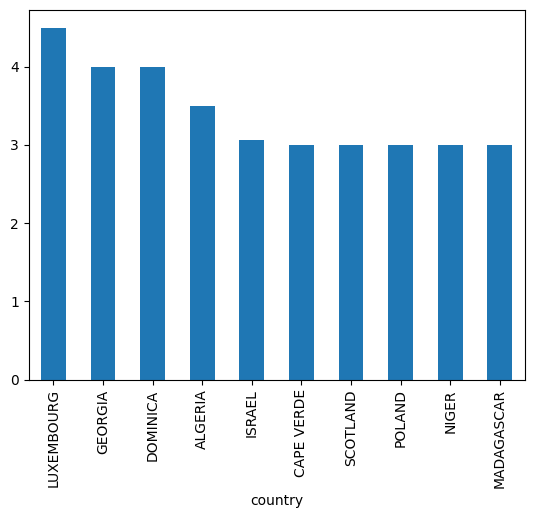

In [53]:
country_visitors = df.groupby('country')['total_visitors'].mean()
country_visitors.sort_values(ascending=False).head(10).plot(kind='bar')
#country_visitors.sort_values(ascending=True).head(10).plot(kind='bar')

In [54]:
df_clean.columns

Index(['country', 'age_group', 'travel_with', 'total_female', 'total_male',
       'purpose', 'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar', 'payment_mode',
       'first_trip_tz', 'most_impressing', 'total_visitors', 'total_cost_usd',
       'cost_per_person'],
      dtype='object')

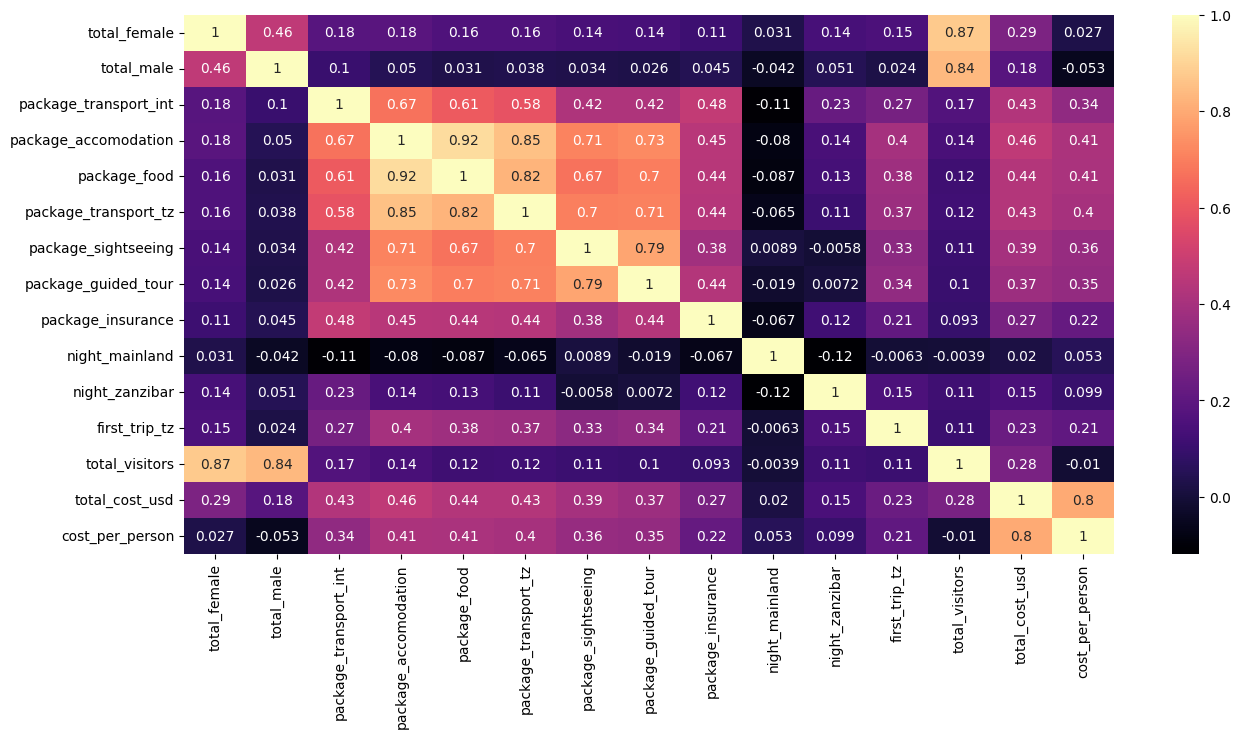

In [55]:
features = ['total_female', 'total_male',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar',
       'first_trip_tz', 'total_visitors',
       'total_cost_usd', 'cost_per_person']
corr_matrix = df_clean[features].corr()

plt.figure(figsize=(15,7))
sns.heatmap(corr_matrix, annot=True ,cmap="magma")
plt.show()

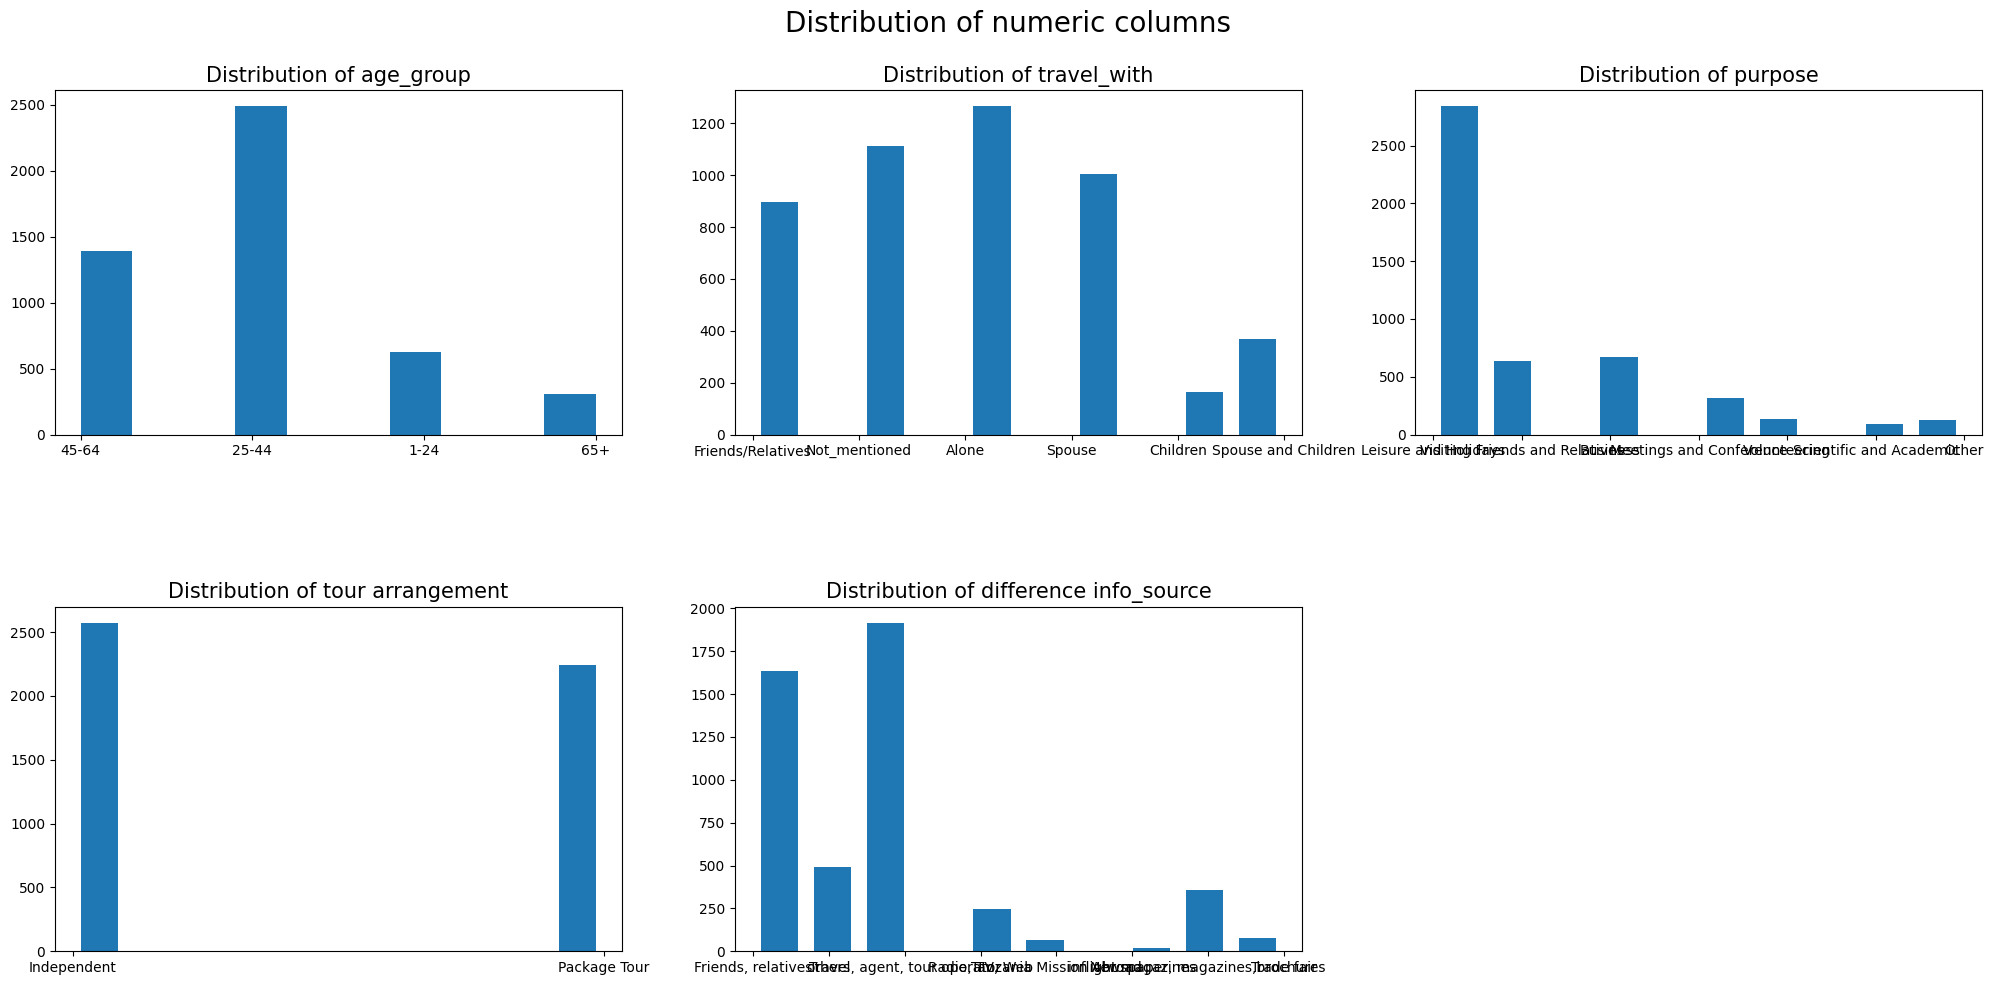

In [56]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].hist(x=df_clean['age_group'])  # creates histogram for number of views
ax[0][0].set_title("Distribution of age_group", fontsize = 15);  # sets title for subplot


ax[0][1].hist(x= df_clean['travel_with'], rwidth=0.7)
ax[0][1].set_title("Distribution of travel_with", fontsize = 15);

ax[0][2].hist(x=df_clean['purpose'], rwidth=0.7)
ax[0][2].set_title("Distribution of purpose", fontsize = 15);

ax[1][0].hist(x=df_clean['tour_arrangement'], rwidth=0.7)
ax[1][0].set_title("Distribution of tour arrangement", fontsize = 15)
#ax[1][0].set_xticks()
#plt.xticks(rotation=45);
                              
ax[1][1].hist(x=df_clean['info_source'], rwidth=0.7)
ax[1][1].set_title("Distribution of difference info_source", fontsize = 15);

fig.delaxes(ax[1][2]);

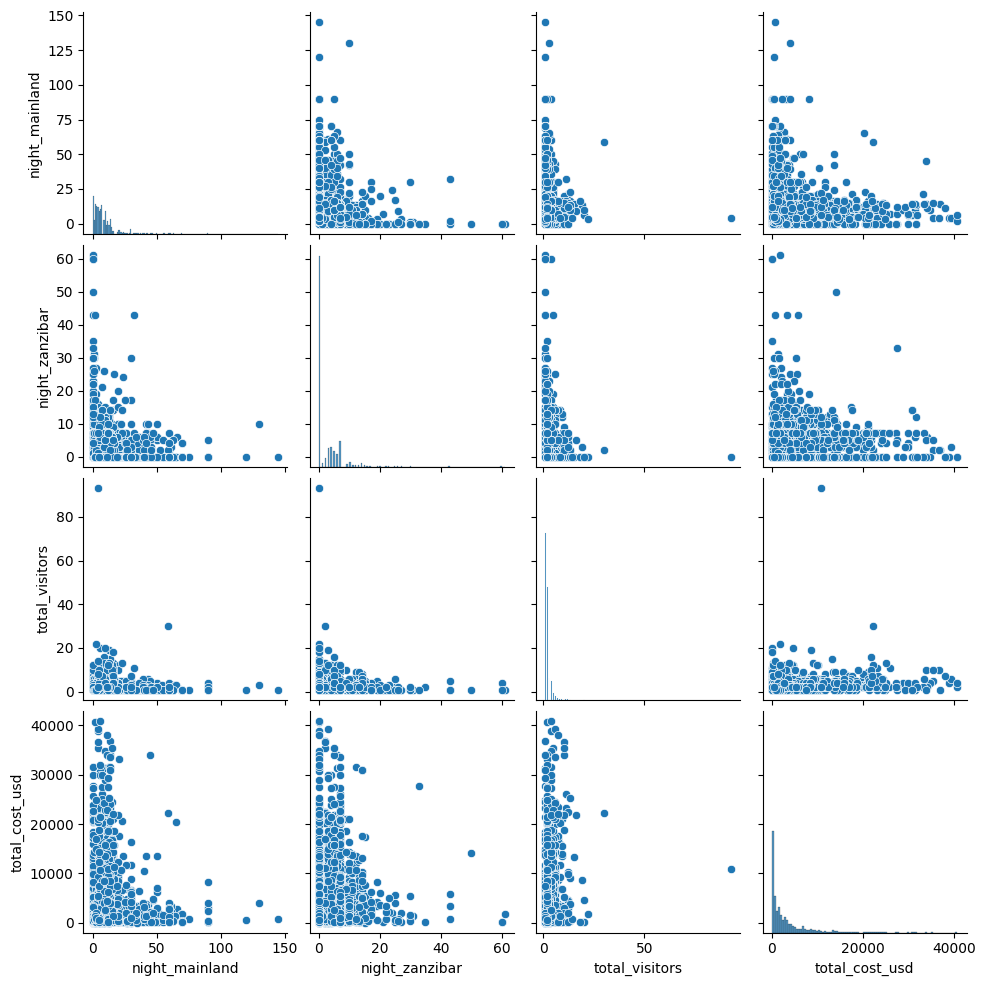

In [57]:
sns.pairplot(df_clean[['country', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'most_impressing', 'total_visitors', 'total_cost_usd']])

In [58]:

#df_clean[df_clean.groupby(['travel_with'])['total_cost_usd'].mean().plot(kind='bar')]
#travel_avg_spending.head()

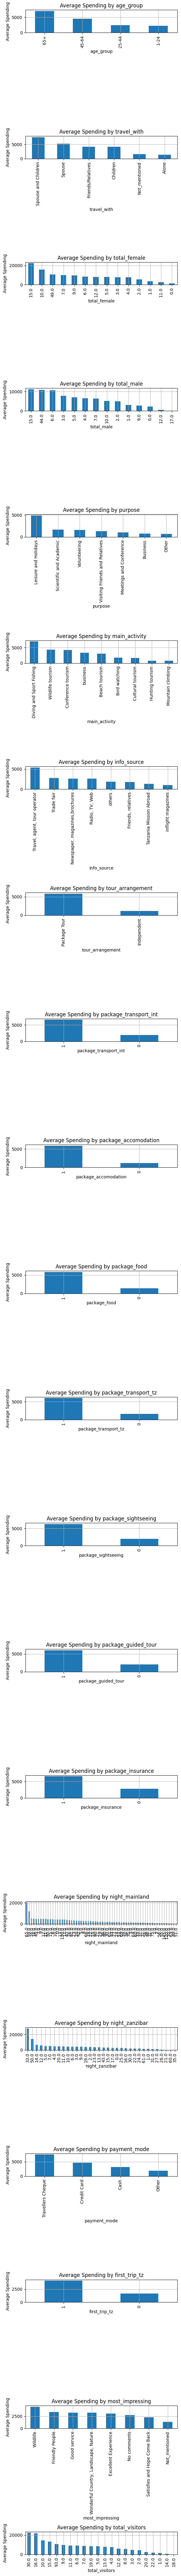

In [59]:
# Define the columns for which you want to generate plots
columns = ['age_group', 'travel_with', 'total_female', 'total_male',
       'purpose', 'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar', 'payment_mode',
       'first_trip_tz', 'most_impressing', 'total_visitors']

# Create subplots for multiple plots
fig, axes = plt.subplots(len(columns), 1, figsize=(6, len(columns) * 4))

# Iterate over columns and generate plots
for i, column in enumerate(columns):
    # Perform the desired operation
    avg_spending = df_clean.groupby([column])['total_cost_usd'].mean().sort_values(ascending=False)
    
    # Create a bar plot
    ax = axes[i]
    avg_spending.plot(kind='bar', ax=ax)
    ax.set_title(f'Average Spending by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Average Spending')
    ax.grid(True)

plt.tight_layout()

# Display the plots
plt.show()

In [60]:
#these means are only where males or females are traveling with the same gender, we are not looking at the groups that have both genders
# the mean of the total cost for male
print(df_clean.query('total_female == 0')['total_cost_usd'].mean())
#total mean of the total cost for female
print(df_clean.query('total_male == 0')['total_cost_usd'].mean())

#according to the results the females are spending more than males

1354.3325717703349
2301.2445971978987


## Plotting and visualization

#### 1. This plot shows frequency distribution plots for the package related features

(Not used in the presentation slides)

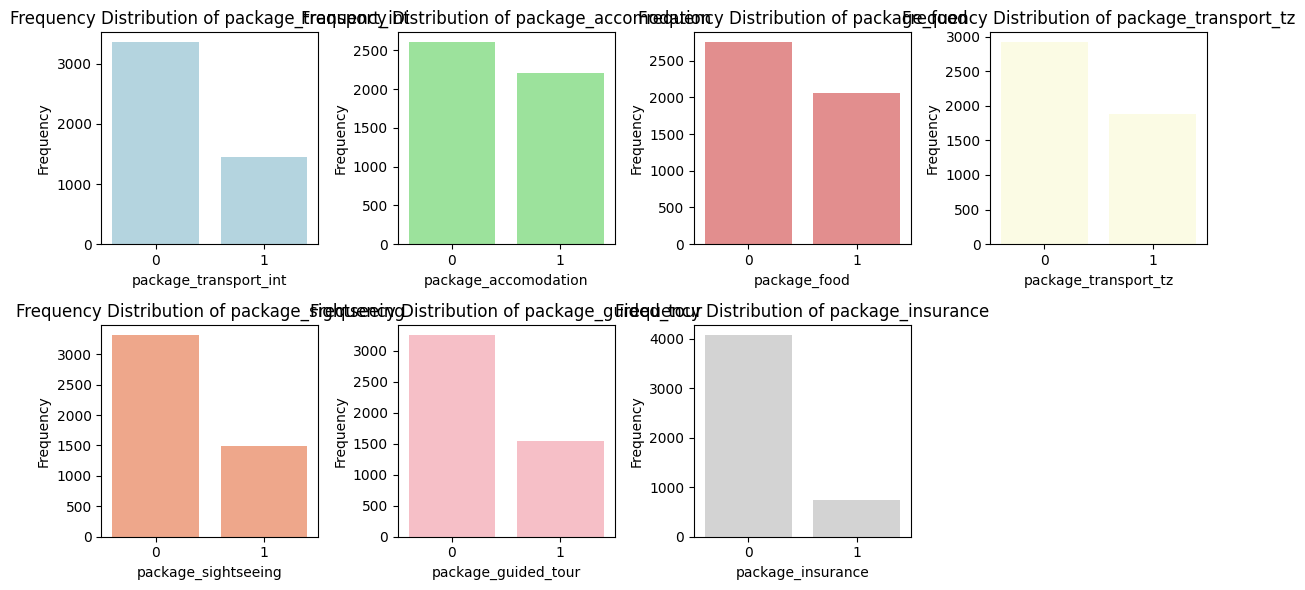

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you want to create frequency distribution plots for the package-related features
package_features = ['package_transport_int', 'package_accomodation', 'package_food',
                    'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
                    'package_insurance']

# Set the color palette for the plots
color_palette = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightsalmon',
                 'lightpink', 'lightgrey']

# Plotting the frequency distribution plots
plt.figure(figsize=(12, 6))
for i, feature in enumerate(package_features):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=feature, data=df_clean, palette=[color_palette[i]])
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Frequency Distribution of {feature}')
plt.tight_layout()
plt.show()

#### 2. Combined featured distribution of package features

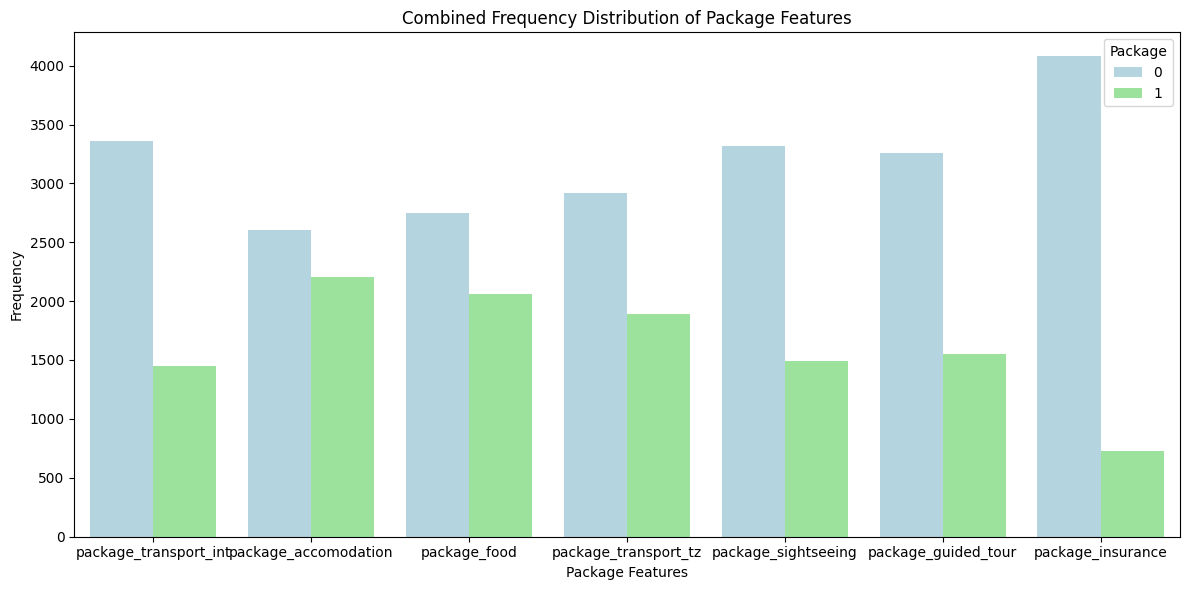

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming we want to create frequency distribution plots for the package-related features
package_features = ['package_transport_int', 'package_accomodation', 'package_food',
                    'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
                    'package_insurance']

# Set the color palette for the plots
color_palette = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightsalmon',
                 'lightpink', 'lightgrey']

# Reshape the data using melt()
melted_data = df_clean.melt(value_vars=package_features)

# Plotting the combined frequency distribution plot
plt.figure(figsize=(12, 6))
sns.countplot(x='variable', hue='value', data=melted_data, palette=color_palette)
plt.xlabel('Package Features')
plt.ylabel('Frequency')
plt.title('Combined Frequency Distribution of Package Features')
plt.legend(title='Package', loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
df.package_insurance.value_counts()

package_insurance
0    4079
1     730
Name: count, dtype: int64

In [ ]:
df.package_sightseeing.value_counts()

package_sightseeing
0    3319
1    1490
Name: count, dtype: int64

#### 3. Frequency distribution of the target

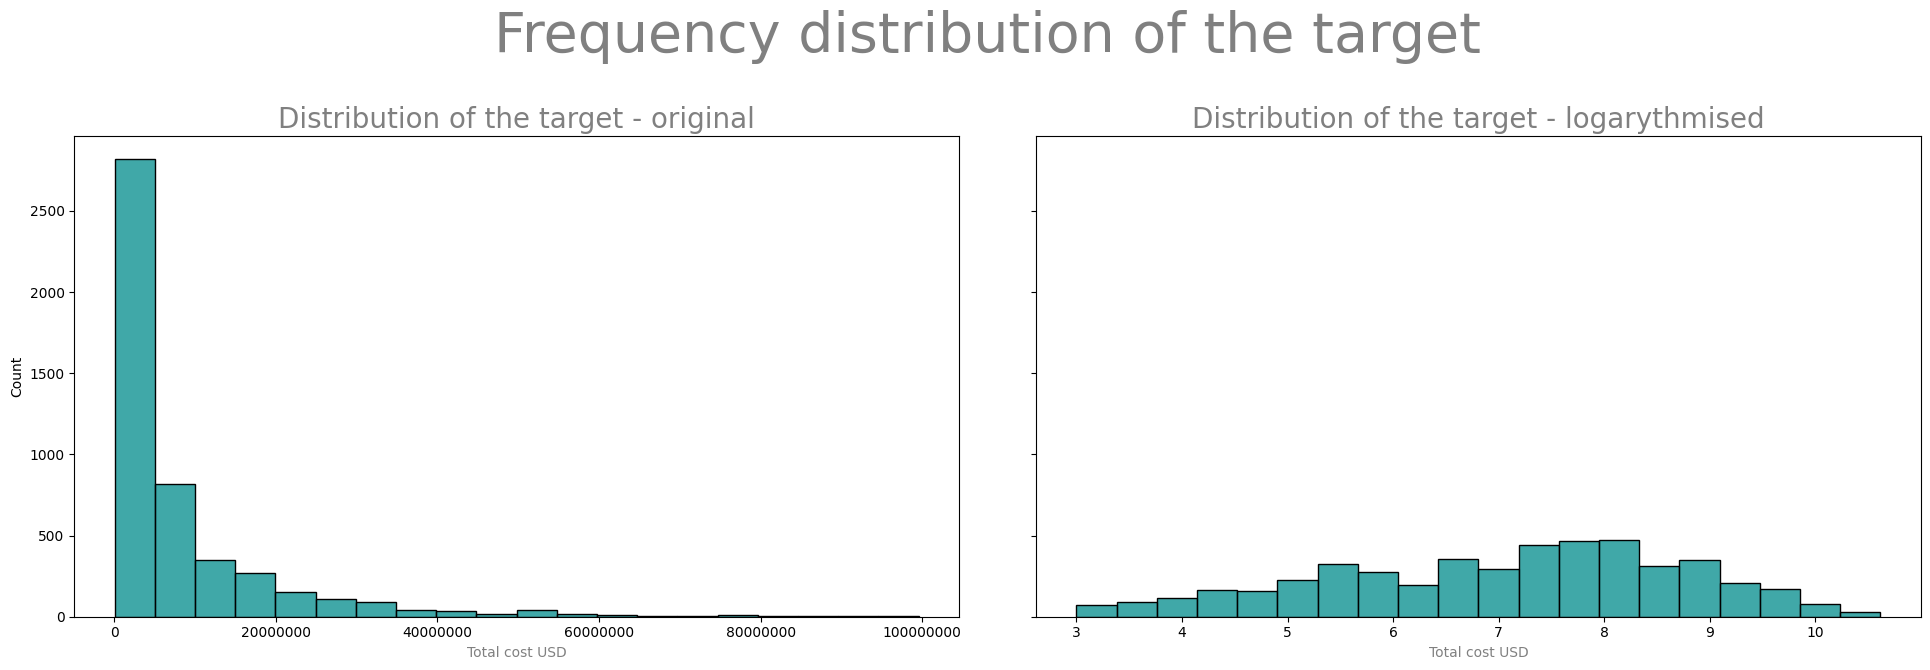

In [ ]:
# Set subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 7), sharey=True)
fig.tight_layout(pad=4)

#define subplot titles
ax[0].set_title('Distribution of the target - original', fontsize = 20, color = 'grey')
ax[1].set_title('Distribution of the target - logarythmised', fontsize = 20, color = 'grey')

ax[0].set_xlabel(xlabel='Total cost USD', color = 'grey')
ax[1].set_xlabel(xlabel='Total cost USD', color = 'grey')


#add overall title and adjust it so that it doesn't overla'p with subplot titles

fig.suptitle('Frequency distribution of the target', fontsize = 40, color = 'grey')
plt.subplots_adjust(top=0.85)

#total_cost_usd_original = df_clean['total_cost_usd'].apply(lambda x: np.exp(x))
total_cost_usd_log = df_clean.total_cost_usd.apply(lambda x: np.log(x))

#plotting
sns.histplot(ax = ax[0],
            data = df['total_cost'],
            color= 'darkcyan',
            bins=20)

sns.histplot(ax = ax[1],
            data = total_cost_usd_log,
            #x= 'grade',
            color = 'darkcyan',
            bins=20)


ax[0].ticklabel_format(style='plain', axis='x') #preventing scientific notation
ax[1].ticklabel_format(style='plain', axis='x')


plt.subplots_adjust(top=0.8)

#### 4. Average mean expenditure per age group

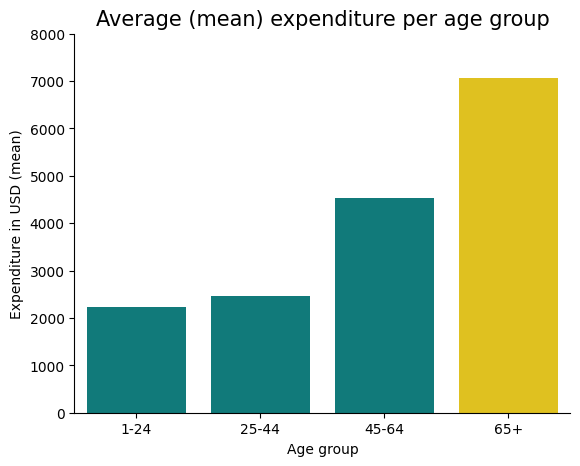

In [ ]:
# create dataframe to plot
df_plot = df
exchange_rate =  0.00041
df_plot['total_cost_usd'] = (df['total_cost']* exchange_rate).round(2)

grouped_data = df.groupby('age_group')['total_cost_usd'].mean().reset_index()

cols = ['darkcyan' if x < 6000 else 'gold' for x in grouped_data.total_cost_usd]

#create barplot using specified colors

sns.barplot(data=grouped_data, x='age_group', y='total_cost_usd', palette=cols)

plt.ylim(top=8000)
plt.subplots_adjust(top=.9)
plt.title('Average (mean) expenditure per age group', fontsize=15)
plt.xlabel('Age group')
plt.ylabel('Expenditure in USD (mean)')
sns.despine()

plt.show()

#### 5. Distribution of numerical columns (info_source, travel_with, purpose, tour_arrangement, purpose_of_trip, age_group)

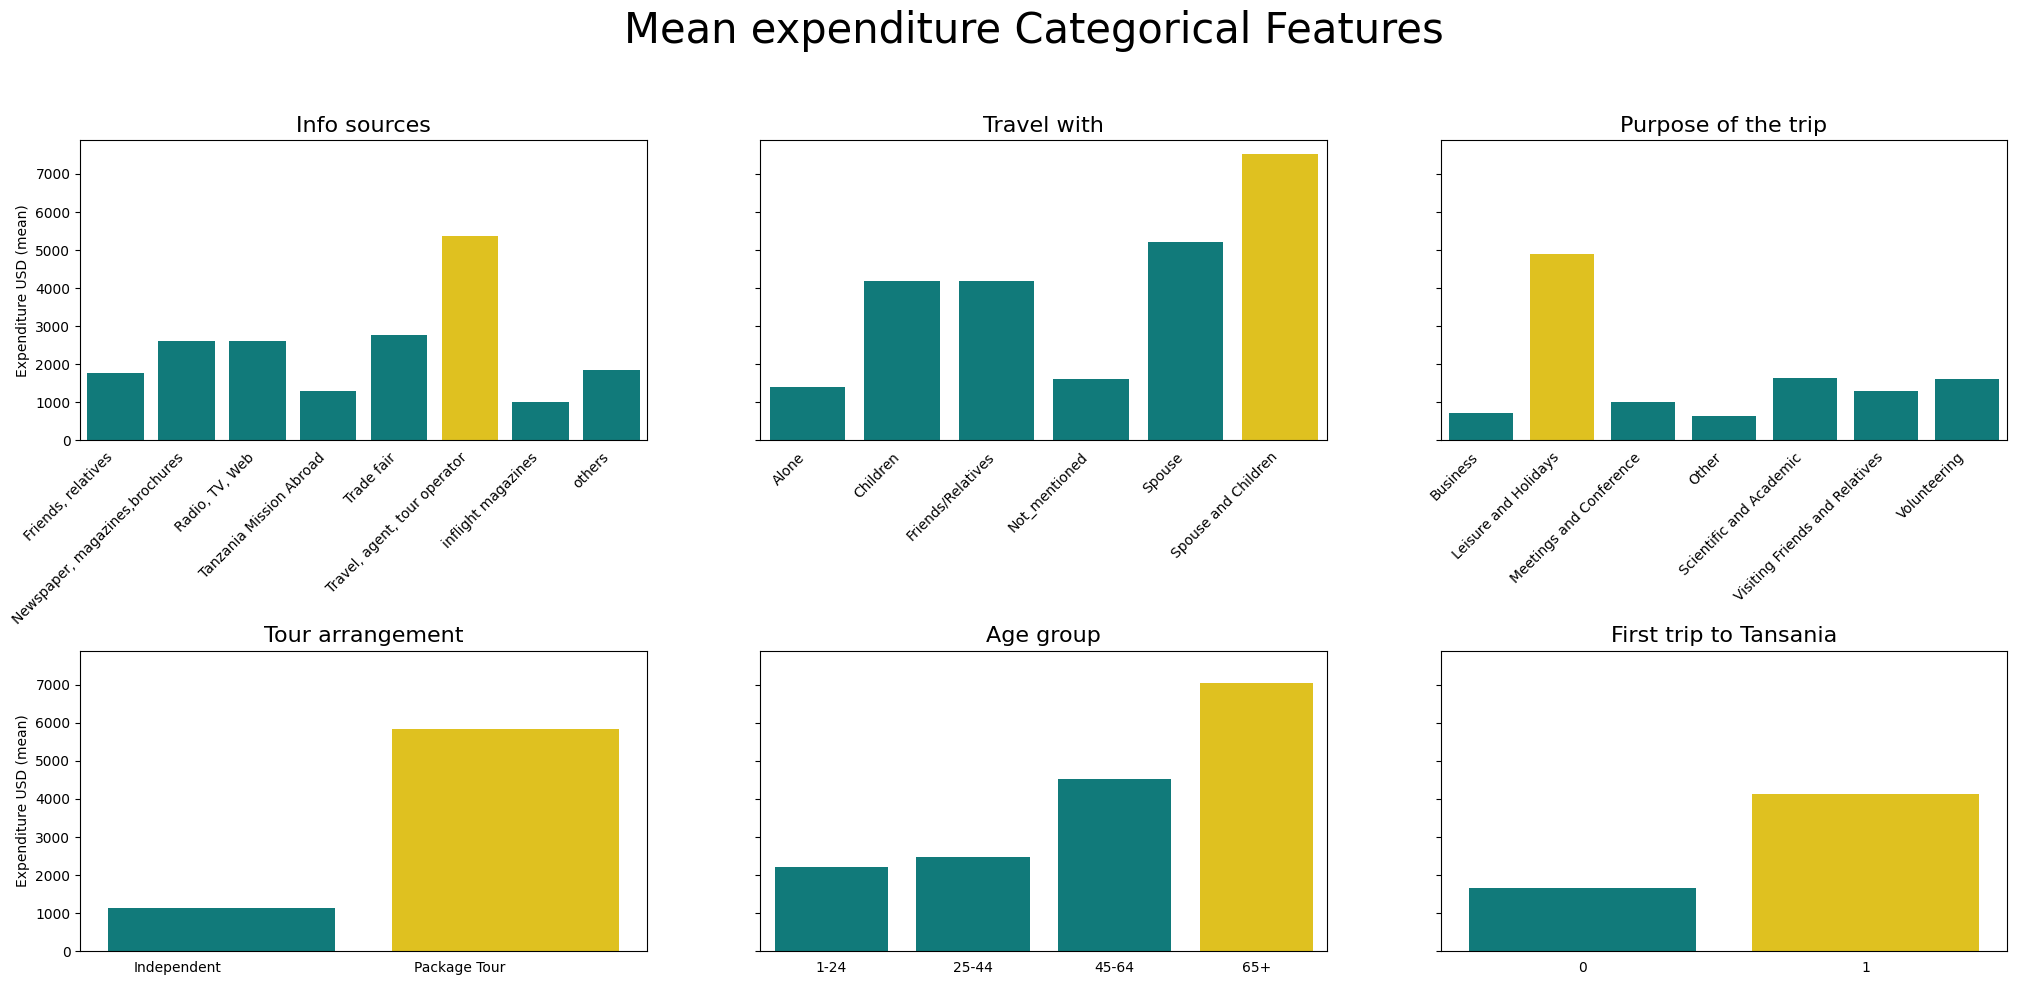

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10), sharey=True)
plt.suptitle('Mean expenditure Categorical Features', fontsize=30)
fig.tight_layout()
plt.subplots_adjust(hspace=0.7, wspace=0.2, top=0.85)

color = 'darkcyan'


grouped_data_info = df.groupby('info_source')['total_cost_usd'].mean().reset_index()
cols = ['darkcyan' if x < 3000 else 'gold' for x in grouped_data_info.total_cost_usd]
info = sns.barplot(data=grouped_data_info, x='info_source', y='total_cost_usd', palette=cols, ax=ax[0, 0])

ax[0, 0].set_title("Info sources", fontsize=16)
ax[0, 0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45, ha='right')
ax[0, 0].set_xlabel('')
ax[0, 0].set_ylabel('Expenditure USD (mean)')

grouped_data_travel = df.groupby('travel_with')['total_cost_usd'].mean().reset_index()
cols = ['darkcyan' if x < 5500 else 'gold' for x in grouped_data_travel.total_cost_usd]
info = sns.barplot(data=grouped_data_travel, x='travel_with', y='total_cost_usd', palette=cols, ax=ax[0, 1])

ax[0, 1].set_title("Travel with", fontsize=16)
ax[0, 1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=45, ha='right')
ax[0, 1].set_xlabel('')
ax[0, 1].set_ylabel('')

grouped_data_purpose = df.groupby('purpose')['total_cost_usd'].mean().reset_index()
cols = ['darkcyan' if x < 4000 else 'gold' for x in grouped_data_purpose.total_cost_usd]
info = sns.barplot(data=grouped_data_purpose, x='purpose', y='total_cost_usd', palette=cols, ax=ax[0, 2])

ax[0, 2].set_title("Purpose of the trip", fontsize=16)
ax[0, 2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[0, 2].set_xticklabels(ax[0, 2].get_xticklabels(), rotation=45, ha='right')
ax[0, 2].set_xlabel('')
ax[0, 2].set_ylabel('')

grouped_data_tour = df.groupby('tour_arrangement')['total_cost_usd'].mean().reset_index()
cols = ['darkcyan' if x < 4000 else 'gold' for x in grouped_data_tour.total_cost_usd]
info = sns.barplot(data=grouped_data_tour, x='tour_arrangement', y='total_cost_usd', palette=cols, ax=ax[1, 0])

ax[1, 0].set_title("Tour arrangement", fontsize=16)
ax[1, 0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=0, ha='right')
ax[1, 0].set_xlabel('')
ax[1, 0].set_ylabel('Expenditure USD (mean)')

grouped_data_age = df.groupby('age_group')['total_cost_usd'].mean().reset_index()
cols = ['darkcyan' if x < 5000 else 'gold' for x in grouped_data_age.total_cost_usd]
info = sns.barplot(data=grouped_data_age, x='age_group', y='total_cost_usd', palette=cols, ax=ax[1, 1])

ax[1, 1].set_title("Age group", fontsize=16)
ax[1, 1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=0)
ax[1, 1].set_xlabel('')
ax[1, 1].set_ylabel('')


grouped_data_first = df.groupby('first_trip_tz')['total_cost_usd'].mean().reset_index()
cols = ['darkcyan' if x < 4000 else 'gold' for x in grouped_data_first.total_cost_usd]
info = sns.barplot(data=grouped_data_first, x='first_trip_tz', y='total_cost_usd', palette=cols, ax=ax[1, 2])

ax[1, 2].set_title("First trip to Tansania", fontsize=16)
ax[1, 2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[1, 2].set_xticklabels(ax[1, 2].get_xticklabels(), rotation=0);
ax[1, 2].set_xlabel('')
ax[1, 2].set_ylabel('');
#fig.delaxes(ax[1, 2])

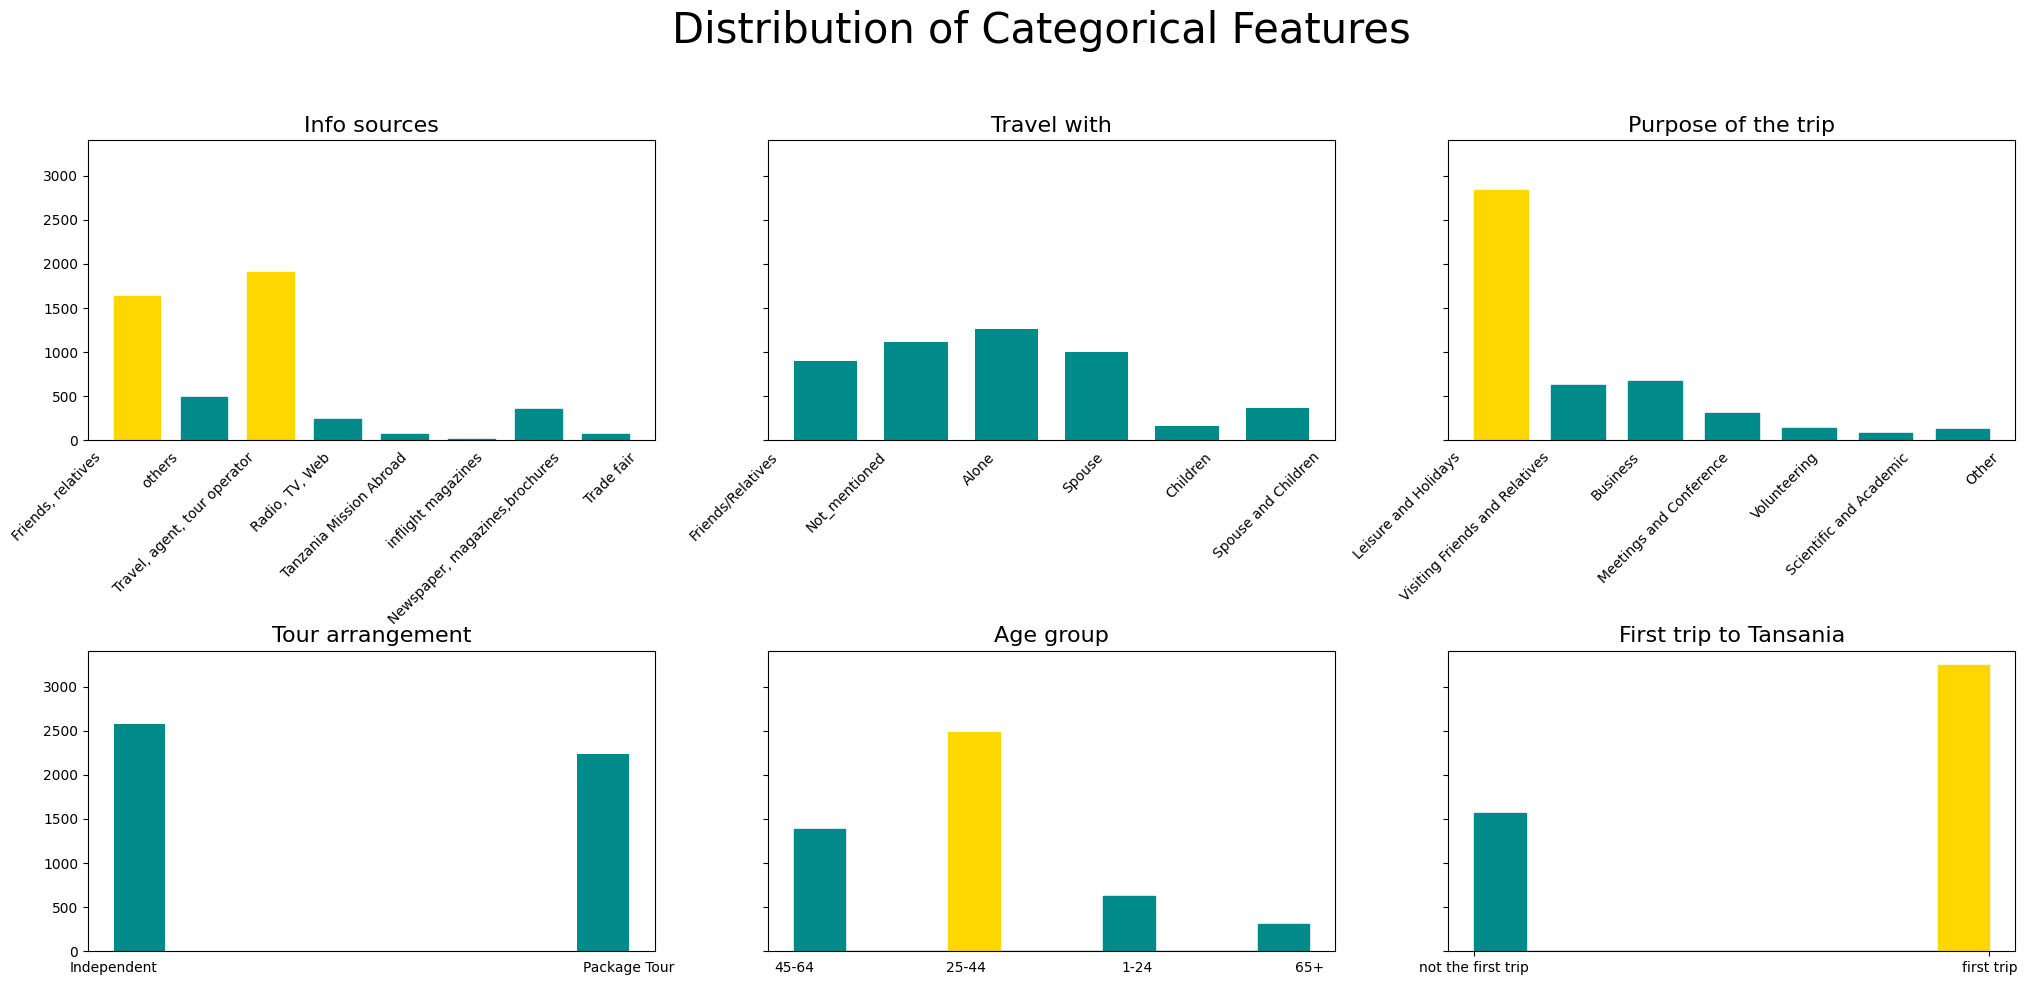

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10), sharey=True)
plt.suptitle('Distribution of Categorical Features', fontsize=30)
fig.tight_layout()
plt.subplots_adjust(hspace=0.7, wspace=0.2, top=0.85)

color = 'darkcyan'


info = ax[0, 0].hist(x=df_plot['info_source'], bins=8, rwidth=0.7, color=color)
for bar in info[2]:
    if bar.get_height() > 1500:
        bar.set_color('gold')
    else:
        bar.set_color('darkcyan')
ax[0, 0].set_title("Info sources", fontsize=16)
ax[0, 0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45, ha='right')

ax[0, 1].hist(x=df_plot['travel_with'], bins=6, rwidth=0.7, color=color)
ax[0, 1].set_title("Travel with", fontsize=16)
ax[0, 1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=45, ha='right')

purpose = ax[0, 2].hist(x=df_plot['purpose'], bins=7, rwidth=0.7)
for bar in purpose[2]:
    if bar.get_height() > 2000:
        bar.set_color('gold')
    else:
        bar.set_color('darkcyan')
ax[0, 2].set_title("Purpose of the trip", fontsize=16)
ax[0, 2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[0, 2].set_xticklabels(ax[0, 2].get_xticklabels(), rotation=45, ha='right')

ax[1, 0].hist(x=df_plot['tour_arrangement'], color=color)
ax[1, 0].set_title("Tour arrangement", fontsize=16)
ax[1, 0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

age = ax[1, 1].hist(x=df_plot['age_group'])
for bar in age[2]:
    if bar.get_height() > 2000:
        bar.set_color('gold')
    else:
        bar.set_color('darkcyan')
ax[1, 1].set_title("Age group", fontsize=16)
ax[1, 1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=0)

first_trip = ax[1, 2].hist(x=df_plot['first_trip_tz'])
for bar in first_trip[2]:
    if bar.get_height() > 2000:
        bar.set_color('gold')
    else:
        bar.set_color('darkcyan')
ax[1, 2].set_title("First trip to Tansania", fontsize=16)
#ax[1, 2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
#ax[1, 2].set_xticklabels(ax[1, 2].get_xticklabels(), rotation=0)
ticks=[0,1]
labels=['not the first trip', 'first trip']
ax[1, 2].set_xticks(ticks)
ax[1, 2].set_xticklabels(labels);

#### 6. Average money spent per country

Note: not used in the slide, but just to show all countries. The y labels are crammed (SEE BELOW FOR GRAPH LIMITED TO 10 COUNTRIES)

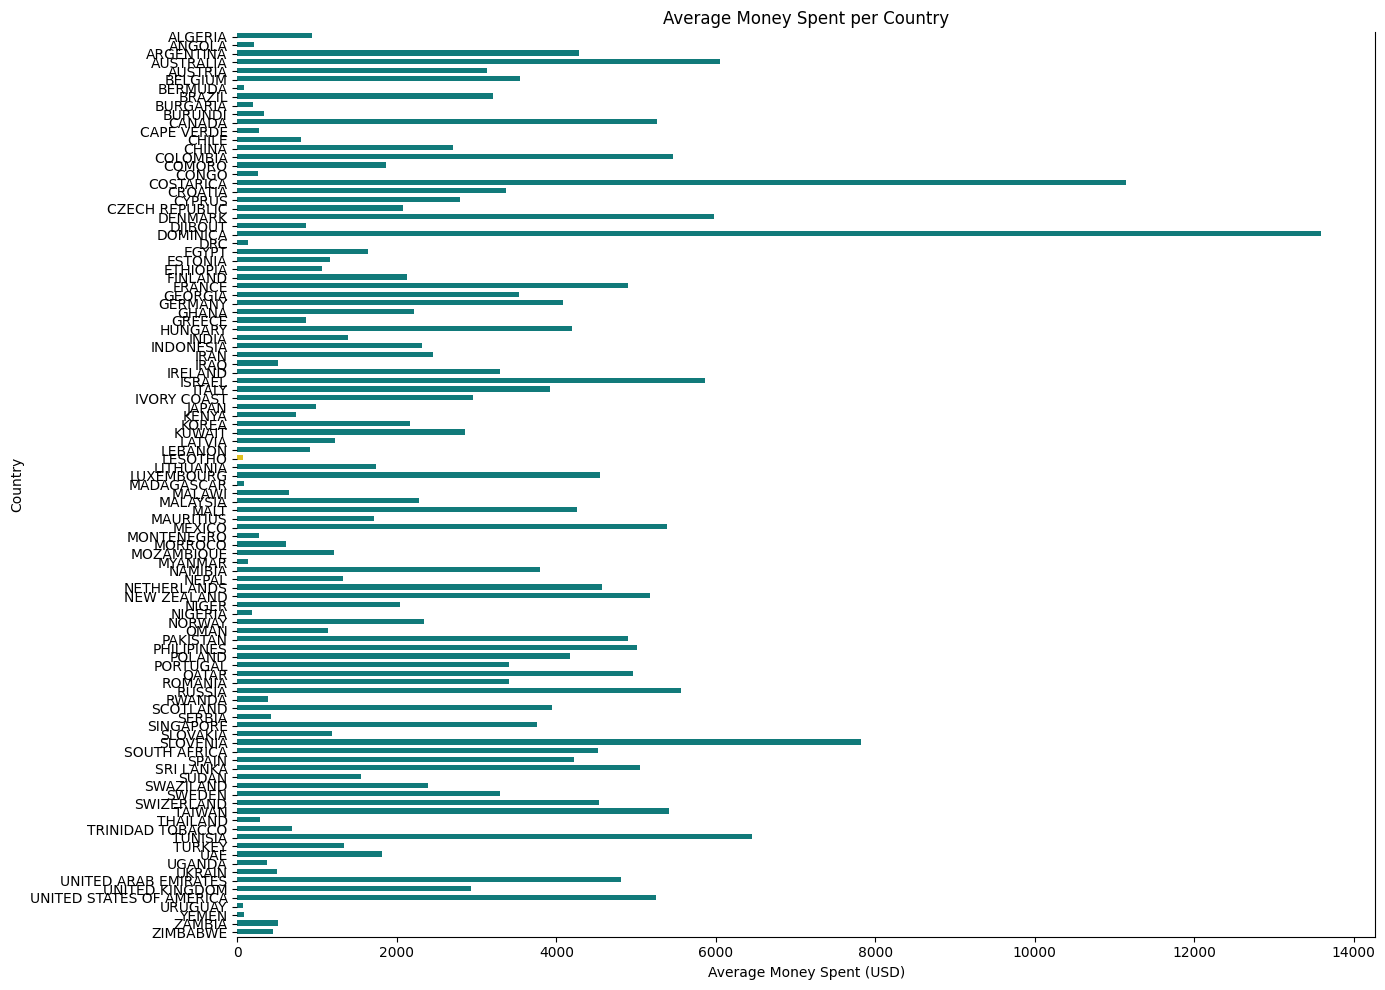

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average money spent per country
average_spending = df.groupby('country')['total_cost_usd'].mean()

# Find the country with the highest average spending
max_spent_country = average_spending.idxmax()

# Create a color palette with gold for the country with the highest average spending
color_palette = ['gold' if country == max_spent_country else 'darkcyan' for country in df['country'].unique()]

plt.figure(figsize=(14, 10))
ax = sns.barplot(y='country', x='total_cost_usd', data=df, ci=None, palette=color_palette)
ax.set_xlabel('Average Money Spent (USD)')
ax.set_ylabel('Country')
ax.set_title('Average Money Spent per Country')

# Adjust the spacing between bars
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# Increase the width of the bars
for bar in ax.patches:
    bar.set_height(0.6)

# Improve readability of y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

# Adjust the spacing between country names
plt.subplots_adjust(left=0.25, bottom=0.1, top=0.9)

plt.tight_layout()
plt.show()


#### 7. Total number of users per country


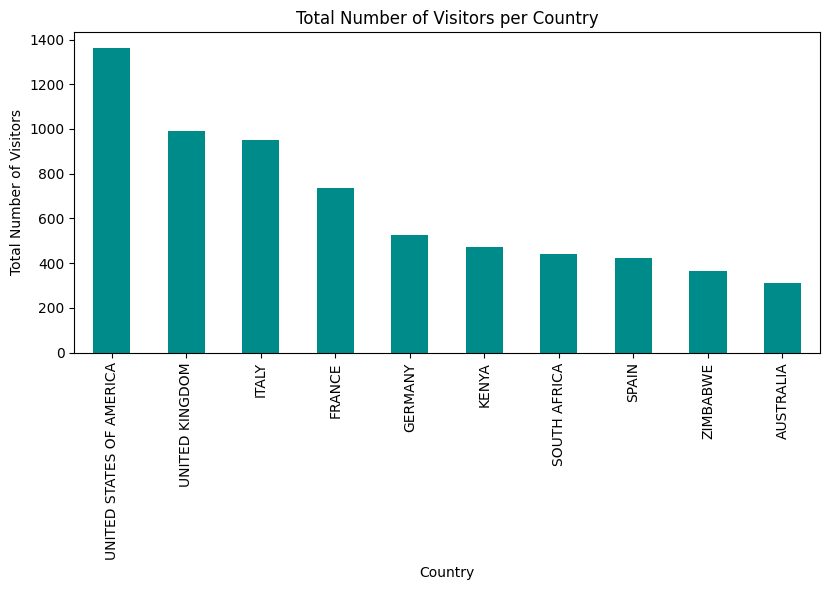

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Find the countries with the highest number of visitors
top_countries = df.groupby('country')['total_visitors'].sum().nlargest(10).index

#Create a color palette with 'gold' for the top countries
#color_palette = ['gold' if country in top_countries else 'darkcyan' for country in df['country'].unique()]

plt.figure(figsize=(16, 6))

#Absolute number of visitors per country
plt.subplot(1, 2, 2)
country_visitors = df.groupby('country')['total_visitors'].sum()
top_visitors_countries = country_visitors.loc[top_countries]
ax2 = top_visitors_countries.plot(kind='bar', color='darkcyan')
ax2.set_xlabel('Country')
ax2.set_ylabel('Total Number of Visitors')
ax2.set_title('Total Number of Visitors per Country')

plt.tight_layout()
plt.show()








#### 8. Total money spent per country


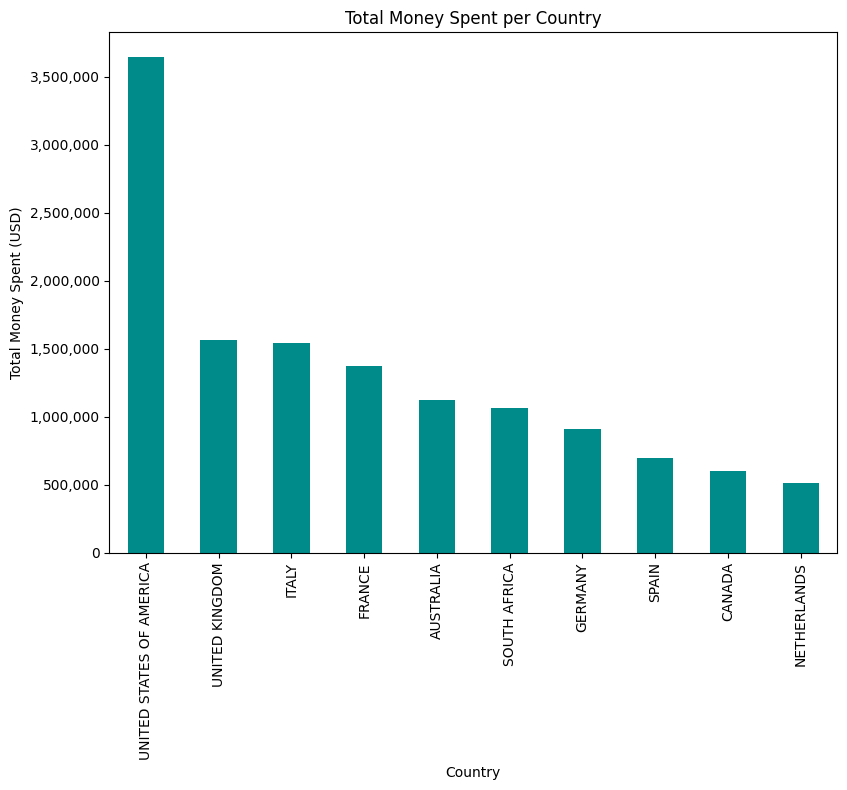

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


plt.figure(figsize=(16, 8))

#Total money spent per country
country_spending = df.groupby('country')['total_cost_usd'].sum()
top_spending_countries = country_spending.nlargest(10)

#Create a color palette with 'gold' for the top spending countries
#color_palette = ['gold' if country in top_spending_countries.index else 'darkcyan' for country in df['country'].unique()]

#Plotting total money spent per country
ax1 = plt.subplot(1, 2, 2)
top_spending_countries.plot(kind='bar', color='darkcyan', ax=ax1)
ax1.set_xlabel('Country')
ax1.set_ylabel('Total Money Spent (USD)')
ax1.set_title('Total Money Spent per Country')

ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))


plt.tight_layout()
plt.show()

#### 9. Average money spent per gender


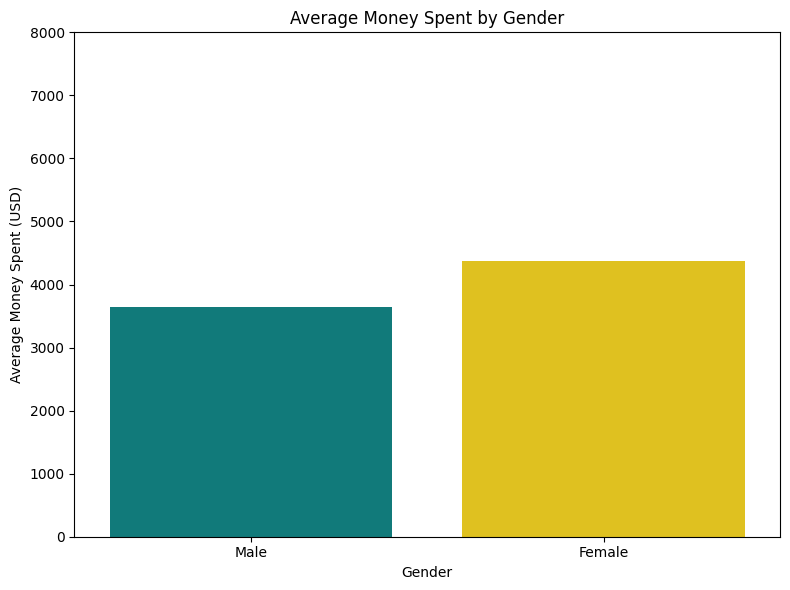

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Calculate the average money spent by males and females
average_spending_male = df['total_cost_usd'][df['total_male'] > 0].mean()
average_spending_female = df['total_cost_usd'][df['total_female'] > 0].mean()

# Create a bar plot
sns.barplot(x=['Male', 'Female'], y=[average_spending_male, average_spending_female], palette=['darkcyan', 'gold'])
plt.xlabel('Gender')
plt.ylabel('Average Money Spent (USD)')
plt.ylim(top=8000)

plt.title('Average Money Spent by Gender')

plt.tight_layout()
plt.show()


#### 10a. Average money spent per booked package (Not Booked)


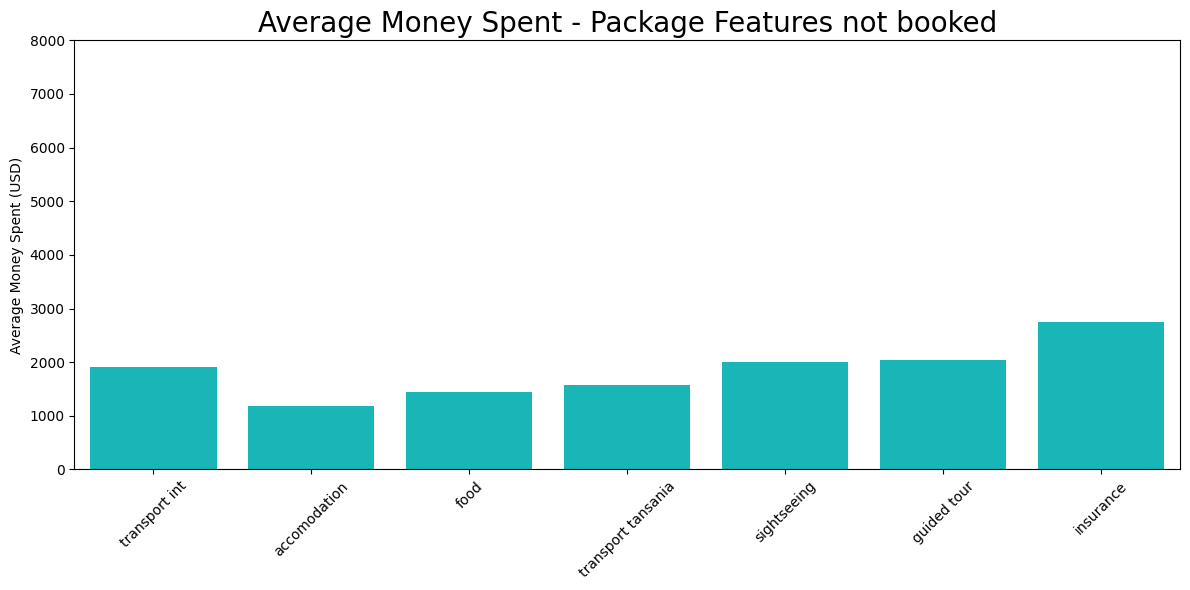

In [ ]:
# Assuming we want to create a bar plot for the average money spent for each package-related feature
package_features = ['package_transport_int', 'package_accomodation', 'package_food',
                    'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
                    'package_insurance']

# Calculate the average money spent for each package feature
average_money_spent = []
for feature in package_features:
    average_spent = df_clean.loc[df_clean[feature] == 0, 'total_cost_usd'].mean()
    average_money_spent.append(average_spent)

# Create a DataFrame with the package features and their corresponding average money spent
data = {'Package Features': package_features, 'Average Money Spent': average_money_spent}
average_money_spent_df = pd.DataFrame(data)

# Plotting the average money spent for each package feature
plt.figure(figsize=(12, 6))
sns.barplot(x='Package Features', y='Average Money Spent', data=average_money_spent_df, color='darkturquoise')
#plt.xlabel('Package Features')
plt.ylabel('Average Money Spent (USD)')
plt.xlabel('')
plt.ylim(top=8000)
plt.title('Average Money Spent - Package Features not booked', fontsize=20)
plt.xticks(ticks=range(len(x_tick_lst)),rotation=45, labels=x_tick_lst, )
plt.tight_layout()
plt.show()

#### 10b. Average money spent per booked package (Booked)


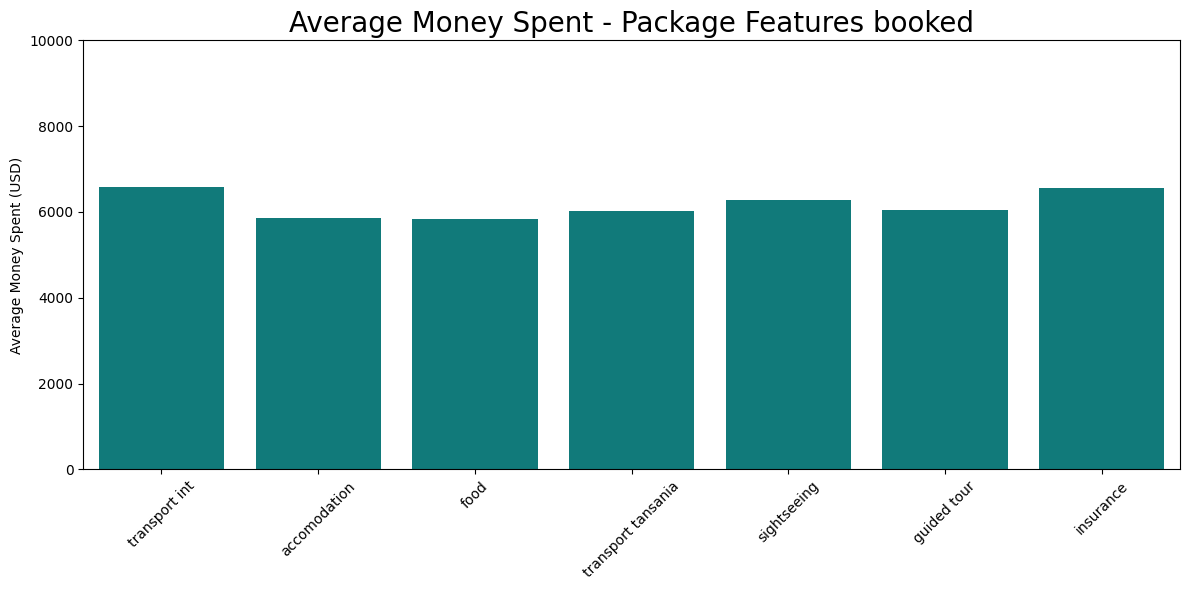

In [ ]:
# Assuming we want to create a bar plot for the average money spent for each package-related feature
package_features = ['package_transport_int', 'package_accomodation', 'package_food',
                    'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
                    'package_insurance']

# Calculate the average money spent for each package feature
average_money_spent = []
for feature in package_features:
    average_spent = df_clean.loc[df_clean[feature] == 1, 'total_cost_usd'].mean()
    average_money_spent.append(average_spent)

# Create a DataFrame with the package features and their corresponding average money spent
data = {'Package Features': package_features, 'Average Money Spent': average_money_spent}
average_money_spent_df = pd.DataFrame(data)

# Plotting the average money spent for each package feature
plt.figure(figsize=(12, 6))
sns.barplot(x='Package Features', y='Average Money Spent', data=average_money_spent_df, color='darkcyan')
#plt.xlabel('Package Features')
plt.ylabel('Average Money Spent (USD)')
plt.xlabel('')
plt.ylim(top=10000)
plt.title('Average Money Spent - Package Features booked', fontsize=20)
plt.xticks(ticks=range(len(x_tick_lst)),rotation=45, labels=x_tick_lst, )
plt.tight_layout()
plt.show()

# first results of EDA
* plotting target variable: on first view, it seems to be, that there are a lot of outliers, but with a closer look, we saw, that the values actually makes sense so we decided to keep all of them<br>
* average spending by age: people over 45 are spending more than people below; people over 65 are the group who are spending the most
* average spending per gender: females are spending in average more than males (almost double as much)
* average spending by main_activity: people who are doing diving and fishing are spending the most 
* average spending per purpose: people who are on leisure and holidays are spending more
* average spending by first_trip: people who are there for the first time are spending way more than the other group
* average spending by payment_mode: people who are using travellers cheques and credit cards are spending more than people who are using cash or other

* heatmap: 
* only the columns including packages are correlating with the target variable, but not very high (between 0.27 and 0.46) -> people who are booking any packages are spending more
* the amount of nights doesn't correlate with the target variable

# Creating the dummy variables, and dropping some columns


In [61]:
#drop cost per person because of correlation with total cost
df_clean = df_clean.drop(['country', 'cost_per_person', 'total_visitors'], axis=1)

In [62]:
#creating dummies for categorical variable
df_clean = pd.get_dummies(df_clean, drop_first=True, dtype=float)
df_clean.head(10)

total_female  total_male  package_transport_int  package_accomodation   
0           1.0         1.0                      0                     0  \
1           1.0         0.0                      0                     0   
2           0.0         1.0                      0                     0   
3           1.0         1.0                      0                     1   
4           1.0         0.0                      0                     0   
5           0.0         1.0                      0                     0   
6           0.0         1.0                      0                     0   
7           1.0         1.0                      1                     1   
8           0.0         1.0                      0                     0   
9           1.0         0.0                      0                     0   

   package_food  package_transport_tz  package_sightseeing   
0             0                     0                    0  \
1             0                     0                    0   
2             0                     0                    0   
3             1                     1                    1   
4             0                     0                    0   
5             0                     0                    1   
6             0                     0                    0   
7             1                     1                    1   
8             0                     0                    0   
9             0                     0                    0   

   package_guided_tour  package_insurance  night_mainland  night_zanzibar   
0                    0                  0            13.0             0.0  \
1                    0                  0            14.0             7.0   
2                    0                  0             1.0            31.0   
3                    1                  0            11.0             0.0   
4                    0                  0             7.0             4.0   
5                    1                  0             9.0             3.0   
6                    0                  0             9.0             0.0   
7                    1                  1            10.0             3.0   
8                    0                  0             4.0             0.0   
9                    0                  0             5.0             0.0   

   first_trip_tz  total_cost_usd  age_group_25-44  age_group_45-64   
0              0          276.59              0.0              1.0  \
1              1         1318.11              1.0              0.0   
2              0         1359.15              1.0              0.0   
3              1         3194.00              1.0              0.0   
4              1          679.58              0.0              0.0   
5              1           49.59              1.0              0.0   
6              1          191.12              0.0              1.0   
7              1         1427.11              0.0              1.0   
8              1          407.74              1.0              0.0   
9              1         1019.36              1.0              0.0   

   age_group_65+  travel_with_Children  travel_with_Friends/Relatives   
0            0.0                   0.0                            1.0  \
1            0.0                   0.0                            0.0   
2            0.0                   0.0                            0.0   
3            0.0                   0.0                            0.0   
4            0.0                   0.0                            0.0   
5            0.0                   0.0                            0.0   
6            0.0                   0.0                            0.0   
7            0.0                   0.0                            1.0   
8            0.0                   0.0                            0.0   
9            0.0                   0.0                            0.0   

   travel_with_Not_mentioned  travel_with_Spouse   
0       

In [63]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 53 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   total_female                                          4809 non-null   float64
 1   total_male                                            4809 non-null   float64
 2   package_transport_int                                 4809 non-null   int64  
 3   package_accomodation                                  4809 non-null   int64  
 4   package_food                                          4809 non-null   int64  
 5   package_transport_tz                                  4809 non-null   int64  
 6   package_sightseeing                                   4809 non-null   int64  
 7   package_guided_tour                                   4809 non-null   int64  
 8   package_insurance                                     4809

In [64]:
df_clean['night_zanzibar'].value_counts()
df_clean.night_zanzibar.mean() #2.30442919525889
df_clean.night_zanzibar.median() #0.0

0.0

<Axes: xlabel='night_zanzibar', ylabel='Count'>

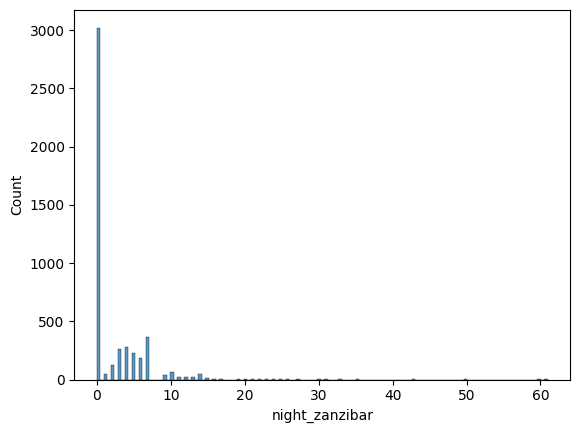

In [65]:
sns.histplot(df_clean['night_zanzibar'])

In [66]:
df_clean['total_female'].value_counts()
df_clean.total_female.mean() #0.926180079018507
df_clean.total_female.median() #1.0

1.0

<Axes: xlabel='total_female', ylabel='Count'>

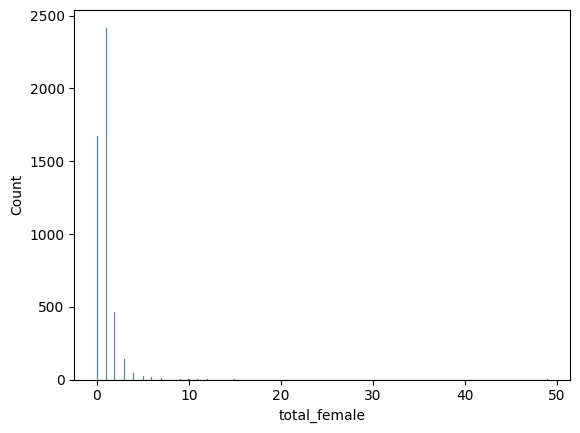

In [67]:
sns.histplot(df_clean['total_female'])

## Train test split and log transformation on the target 

In [68]:
#defining X and y for the train test split
X = df_clean.drop('total_cost_usd', axis=1)
y = df_clean['total_cost_usd']

In [69]:
y.mean()

3326.899586192556

In [70]:
# Log-transform skewed features using np.log()
y = y.apply(lambda x: np.log(x))

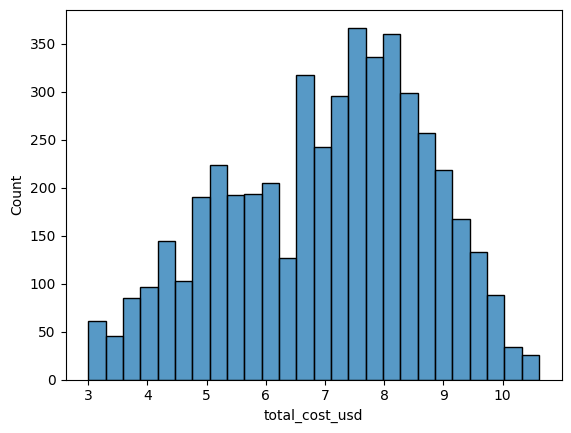

In [71]:
# histplot for log transformed target
sns.histplot(y);

In [72]:
X['total_female']

0        1.0
1        1.0
2        0.0
3        1.0
4        1.0
5        0.0
6        0.0
7        1.0
8        0.0
9        1.0
10       1.0
11       2.0
12       0.0
13       2.0
14       0.0
15       1.0
16       4.0
17       1.0
18       1.0
19       1.0
20       1.0
21       0.0
22       1.0
23       1.0
24       1.0
25       2.0
26       0.0
27       1.0
28       3.0
29       0.0
30       0.0
31       1.0
32       2.0
33       0.0
34       1.0
35       2.0
36       1.0
37       1.0
38       1.0
39       0.0
40       1.0
41       0.0
42       1.0
43       0.0
44       1.0
45       0.0
46       0.0
47       1.0
48       1.0
49       0.0
50       0.0
51       2.0
52       1.0
53       1.0
54       1.0
55       1.0
56       1.0
57       2.0
58       0.0
59       0.0
60       1.0
61       1.0
62       1.0
63       1.0
64       0.0
65       1.0
66       0.0
67       2.0
68       2.0
69       1.0
70       0.0
71       1.0
72       2.0
73       0.0
74       1.0
75       1.0
76       1.0

In [73]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RSEED) #didn't type in a test size so we used default value

In [74]:
col_scale = ['total_female', 'total_male', 'night_zanzibar', 'night_mainland']
print(col_scale)
print(X_train[col_scale])

['total_female', 'total_male', 'night_zanzibar', 'night_mainland']
      total_female  total_male  night_zanzibar  night_mainland
3075           0.0         1.0             0.0             2.0
2915           2.0         2.0            12.0             0.0
2304           1.0         1.0             6.0             3.0
1196           0.0         2.0             0.0             2.0
620            1.0         0.0             0.0             3.0
1215           1.0         1.0             7.0             7.0
2700           1.0         0.0             0.0             6.0
1189           0.0         1.0             0.0             7.0
328            1.0         1.0             0.0            10.0
3082           1.0         1.0             7.0             0.0
897            1.0         0.0             9.0            10.0
2655           0.0         1.0             0.0             6.0
1123           1.0         0.0             0.0            14.0
3942           1.0         1.0             3.0     

In [75]:
scaler2 = StandardScaler()
col_scale = ['total_female', 'total_male', 'night_zanzibar', 'night_mainland']
X_train_scaled2 = scaler2.fit_transform(X_train[col_scale]) # why not y_train?
X_test_scaled2 = scaler2.transform(X_test[col_scale])
# It follows the same syntax as the StandardScaler.
# Don't forget: you have to import the scaler at the top of your notebook. 
X_train_all = np.concatenate([X_train_scaled2, X_train.drop(col_scale, axis=1)], axis=1)
X_test_all = np.concatenate([X_test_scaled2, X_test.drop(col_scale, axis=1)], axis=1)
#X = np.concatenate([X, X.drop(col_scale, axis=1)], axis=1)


In [76]:
print(X_train_all)

[[-0.69850195 -0.00980774 -0.54604551 ...  0.          0.
   0.        ]
 [ 0.78445244  0.83225717  2.28608698 ...  0.          0.
   0.        ]
 [ 0.04297525 -0.00980774  0.87002073 ...  0.          0.
   0.        ]
 ...
 [-0.69850195 -0.00980774 -0.54604551 ...  0.          0.
   0.        ]
 [-0.69850195 -0.00980774 -0.54604551 ...  1.          0.
   0.        ]
 [ 0.04297525 -0.00980774 -0.54604551 ...  0.          0.
   0.        ]]


## Baseline model

In [77]:

# define our target and predictor variables
X_train_base = X_train[['age_group_25-44', 'age_group_45-64', 'age_group_65+']]
X_train_base.shape

X_test_base = X_test[['age_group_25-44', 'age_group_45-64', 'age_group_65+']]
X_test_base.shape

(1203, 3)

In [78]:
# Instantiate our model 
#lin_reg = 
lin_reg_base = LinearRegression()
# Fit the model using our train data 
lin_reg_base.fit(X_train_base, y_train)

LinearRegression()

In [79]:
# Make predictions on the test data and save those in "y_pred"
#y_pred = 
y_pred_test_base = lin_reg_base.predict(X_test_base)
y_pred_train_base = lin_reg_base.predict(X_train_base)

In [80]:
# Calculate metric
def calculate_metrics(y_train, y_pred_train, y_test, y_pred_test):
    """Calculate and print out RMSE and R2 for train and test data
    Args:
        y_train (array): true values of y_train
        y_pred_train (array): predicted values of model for y_train
        y_test (array): true values of y_test
        y_pred_test (array): predicted values of model for y_test
    """

    print("Metrics on training data") 
    rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
    r2 = r2_score(y_train,y_pred_train)
    print("RMSE:", round(rmse_train, 3))
    print("RMSE Antilog", np.exp(rmse_train) )
    print("R2:", round(r2, 3))
    print("Mean of the y train set", (y_train.mean()))
    print("Antilog of the mean of the y train set", (np.exp(y_train.mean())))
    print("Mean absolute error", mean_absolute_error(y_train, y_pred_train))
    print("Mean absolute error antilog", np.exp(mean_absolute_error(y_train, y_pred_train)) )
    print("---"*10)
    
    # Calculate metric
    print("Metrics on test data")  
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
    # you can get the same result with this line:
    # rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))

    r2 = r2_score(y_test,y_pred_test)
    print("RMSE:", round(rmse_test, 3))
    print("RMSE Antilog", np.exp(rmse_test))
    print("R2:", round(r2, 3))
    print("Mean of the y test set", (y_test.mean()))
    print("Antilog of the mean of the y test set", (np.exp(y_test.mean())))
    print("Mean absolute error", mean_absolute_error(y_test, y_pred_test))
    print("Mean absolute error antilog", np.exp(mean_absolute_error(y_test, y_pred_test)) )
    print("---"*10)


In [81]:
print("Linear Regression Model:")
print("---"*10)
calculate_metrics(y_train, y_pred_train_base, y_test, y_pred_test_base)

Linear Regression Model:
------------------------------
Metrics on training data
RMSE: 1.632
RMSE Antilog 5.111758494448025
R2: 0.068
Mean of the y train set 7.03081902917327
Antilog of the mean of the y train set 1130.9565173435292
Mean absolute error 1.3484150538136752
Mean absolute error antilog 3.8513165612857883
------------------------------
Metrics on test data
RMSE: 1.599
RMSE Antilog 4.947654912757706
R2: 0.066
Mean of the y test set 7.017067888715411
Antilog of the mean of the y test set 1115.5110154415581
Mean absolute error 1.3324521668444982
Mean absolute error antilog 3.7903265140371416
------------------------------


In [82]:
#if we need to interpret these coefficients we need to scale
intercept = lin_reg_base.intercept_
slope = lin_reg_base.coef_
print("Model intercept:", intercept)
print("Coefficient for feature weight:", slope)

Model intercept: 6.635683544696217
Coefficient for feature weight: [0.12364423 0.79007427 1.56552565]


1st result: the error is high on training and test data as well, so the model is underfitting / biased<br><br>
RMSE on train data: 4869.632
RMSE on test data: 4688.419<br><br>
Because of that bad result we decided to log transform the target.<br><br>
2nd result: the error now ist lower than before. So our model is performing really better.
Metrics on training data
RMSE: 0.259
Metrics on test data
RMSE: 0.253

Milestone 1:<br>
Tansania tourism expenditure prediction:<br>
Value of Product:<br>
Create a predictive model, with which people are able to predict how much money they will need if they visit Tansania.<br>
Prediction:<br>
total expenditure<br>
Evaluation Metric:<br>
RMSE
The RMSE penalises large prediction errors. For our customers large errors in prediction are the worst case. Because of that we chose the RMSE.<br>
Baseline Model:<br>
Linear Regression with target variable total_cost and features age groups of 1-24, 25-44, 45-64, 65+<br>
Because of the skewed distribution of our target it has been log transformed.
Score:<br>
Metrics on training data
RMSE: 0.259
Metrics on test data
RMSE: 0.253
The baseline model working with the log transformed target is performing much better than without log transformation.  <br>

As our target is not normally distributed but right skewed, a log transformation of the target could help.

## To do list for thursday
adding all features <br>
printing error plots (distribution of residuals) <br>
if suitable, try: ridge/lasso/elastic net regression or polynomials (about 2-3hrs) <br>
<br> short overview in slides of EDA (average spending by age etc)


In [83]:
df_clean.total_cost_usd.describe()
df_clean.head(10)


total_female  total_male  package_transport_int  package_accomodation   
0           1.0         1.0                      0                     0  \
1           1.0         0.0                      0                     0   
2           0.0         1.0                      0                     0   
3           1.0         1.0                      0                     1   
4           1.0         0.0                      0                     0   
5           0.0         1.0                      0                     0   
6           0.0         1.0                      0                     0   
7           1.0         1.0                      1                     1   
8           0.0         1.0                      0                     0   
9           1.0         0.0                      0                     0   

   package_food  package_transport_tz  package_sightseeing   
0             0                     0                    0  \
1             0                     0                    0   
2             0                     0                    0   
3             1                     1                    1   
4             0                     0                    0   
5             0                     0                    1   
6             0                     0                    0   
7             1                     1                    1   
8             0                     0                    0   
9             0                     0                    0   

   package_guided_tour  package_insurance  night_mainland  night_zanzibar   
0                    0                  0            13.0             0.0  \
1                    0                  0            14.0             7.0   
2                    0                  0             1.0            31.0   
3                    1                  0            11.0             0.0   
4                    0                  0             7.0             4.0   
5                    1                  0             9.0             3.0   
6                    0                  0             9.0             0.0   
7                    1                  1            10.0             3.0   
8                    0                  0             4.0             0.0   
9                    0                  0             5.0             0.0   

   first_trip_tz  total_cost_usd  age_group_25-44  age_group_45-64   
0              0          276.59              0.0              1.0  \
1              1         1318.11              1.0              0.0   
2              0         1359.15              1.0              0.0   
3              1         3194.00              1.0              0.0   
4              1          679.58              0.0              0.0   
5              1           49.59              1.0              0.0   
6              1          191.12              0.0              1.0   
7              1         1427.11              0.0              1.0   
8              1          407.74              1.0              0.0   
9              1         1019.36              1.0              0.0   

   age_group_65+  travel_with_Children  travel_with_Friends/Relatives   
0            0.0                   0.0                            1.0  \
1            0.0                   0.0                            0.0   
2            0.0                   0.0                            0.0   
3            0.0                   0.0                            0.0   
4            0.0                   0.0                            0.0   
5            0.0                   0.0                            0.0   
6            0.0                   0.0                            0.0   
7            0.0                   0.0                            1.0   
8            0.0                   0.0                            0.0   
9            0.0                   0.0                            0.0   

   travel_with_Not_mentioned  travel_with_Spouse   
0       

In [84]:
def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.3)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.3)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[1].set_ylim((residuals.min()-10), (residuals.max()+10))

## Milestone 2

### Regression Analysis with all the features  

In [85]:
#X and y are already defined where we did the train test split

In [86]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X_train_all, y_train, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
mean(absolute(scores))


0.8814336008503127

In [87]:
#use LOOCV to evaluate model
scores = cross_val_score(model, X_train_all, y_train, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view RMSE
np.sqrt(mean(absolute(scores)))


1.1684423538974162

In [88]:
cv_predict = cross_val_predict(model, X=X_train, y=y_train, cv=5)
np.sqrt(mean_squared_error(y_train, cv_predict))

1.1687516106104425

In [89]:
# Instantiate our model 
#lin_reg = 
lin_reg = LinearRegression()
# Fit the model using our train data 
lin_reg.fit(X_train_all, y_train)

LinearRegression()

In [90]:
# Make predictions on the test data and save those in "y_pred"

y_pred_test = lin_reg.predict(X_test_all)
y_pred_train = lin_reg.predict(X_train_all)

In [91]:
print("Linear Regression Model:")
print("---"*10)
calculate_metrics(y_train,y_pred_train, y_test, y_pred_test)

Linear Regression Model:
------------------------------
Metrics on training data
RMSE: 1.146
RMSE Antilog 3.144789044737104
R2: 0.541
Mean of the y train set 7.03081902917327
Antilog of the mean of the y train set 1130.9565173435292
Mean absolute error 0.8648257078472739
Mean absolute error antilog 2.3745921771252294
------------------------------
Metrics on test data
RMSE: 1.189
RMSE Antilog 3.282782289999663
R2: 0.484
Mean of the y test set 7.017067888715411
Antilog of the mean of the y test set 1115.5110154415581
Mean absolute error 0.8927013545571387
Mean absolute error antilog 2.441716692832311
------------------------------


In [92]:
#if we need to interpret these coefficients we need to scale
intercept = lin_reg.intercept_
slope = lin_reg.coef_
print("Model intercept:", intercept)
print("Coefficient for feature weight:", slope)

Model intercept: 5.37248542235773
Coefficient for feature weight: [ 0.12432976 -0.02484822  0.17851733  0.23652139  0.30640507  0.09075232
  0.16944536  0.09779086  0.08673632 -0.11417596 -0.03309538  0.09122058
  0.20268193  0.40660936  0.74653156  0.49040214  0.38788274 -0.06618402
  0.42735042  0.69868817  0.60584839  0.12417252 -0.17468847 -0.15026569
  0.00811594  0.40528309 -0.48313353  0.40597727 -0.30313722  0.70383616
 -0.36965453 -0.18104497  0.22189531 -0.18747775  0.0490125   0.12656138
 -0.25497601  0.12697396  0.08238299 -0.0476124   0.01624363  0.67007147
  0.41570242  0.35972821 -0.0922181  -0.10190119  0.05604038 -0.0314959
  0.10109445 -0.07568359  0.10233292  0.07696943]


In [93]:
test_set = [[1, 0, 1, 1,1,0, 0, 0, 0, 1, 1, 0, 1, 1,1,0, 0, 0, 0, 1, 1, 0, 1, 1,1,0, 0, 0, 0, 1,1, 0, 1, 1,1,0, 0, 0, 0, 1, 1, 0, 1, 1,1,0, 0, 0, 0, 1, 1,1]]
#test_set = test_set.reshape()
pred_test_enet2 = lin_reg.predict(test_set)
pred_test_enet2

array([9.58758301])

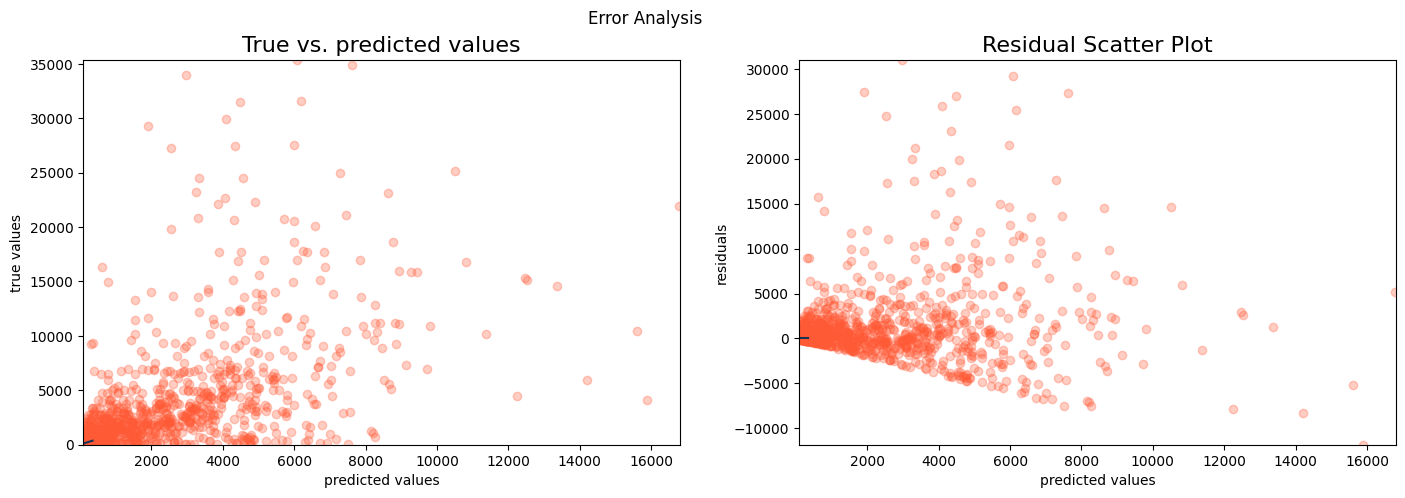

In [94]:
error_analysis(np.exp(y_test), np.exp(y_pred_test))

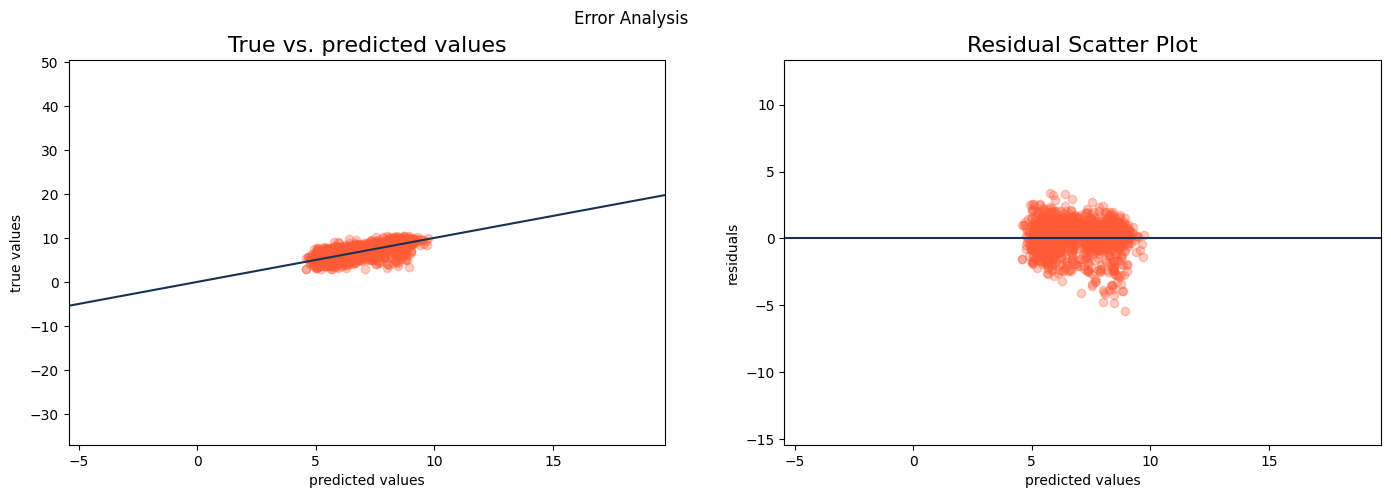

In [95]:
error_analysis(y_test, y_pred_test)

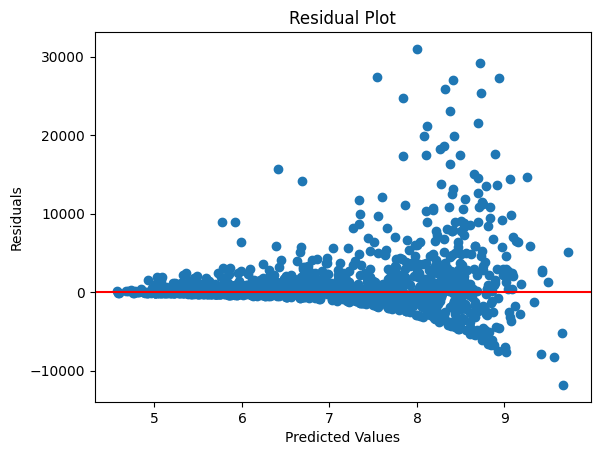

In [96]:
residuals = np.exp(y_test) - np.exp(y_pred_test)
plt.scatter(y_pred_test, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.show()

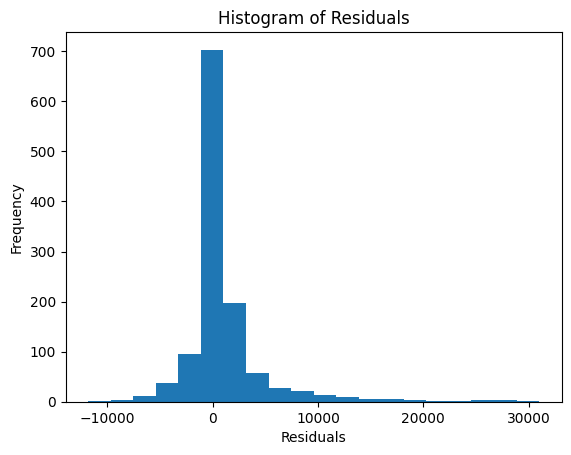

In [97]:
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

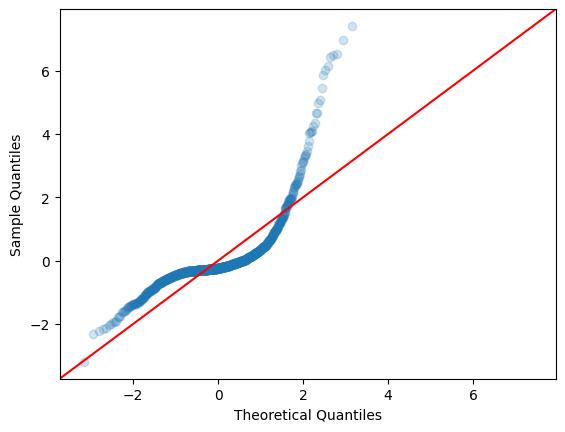

In [98]:
import statsmodels.api as sm

# create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(residuals, fit=True, line="45", alpha=0.2)
plt.show()

##### Discussion of results:

<b>For our baseline model we had the following results:</b><br>
<b>Metrics on training data</b><br>
RMetrics on training data<br>
RMSE: 1.632<br>
RMSE Antilog 5.111758494448025<br>
R2: 0.068<br>
Mean of the y train set 7.03081902917327<br>
Antilog of the mean of the y train set 1130.9565173435292<br>

<b>Metrics on test data</b>
RMSE: 1.599<br>
RMSE Antilog 4.947654912757706<br>
R2: 0.066<br>
Mean of the y test set 7.017067888715411<br>
Antilog of the mean of the y test set 1115.5110154415581<br>

<b>For our model 1 with all the features we have the following results:</b><br>
<b>Metrics on training data</b><br>
RMSE: 1.146<br>
RMSE Antilog 3.144789044737104<br>
R2: 0.541<br>
Mean of the y train set 7.03081902917327<br>
Antilog of the mean of the y train set 1130.9565173435292<br>

<b>Metrics on test data</b><br>
RMSE: 1.189<br>
RMSE Antilog 3.2827822899996626<br>
R2: 0.484<br>
Mean of the y test set 7.017067888715411<br>
Antilog of the mean of the y test set 1115.5110154415581<br>
<br>
Average amount for y_train for our model 1 is 1130.96, RMSE is 1.146 so our model is +/- 1.146 $  off (reverse the log transformation for both values to interpret the results)

## Regularization

### ElasticNet

In [99]:
#Elastic Net model - by default alpha is 1 and l1_ratio is 0.5
model_enet = ElasticNet(alpha = 0.005)
model_enet.fit(X_train_all, y_train) 
pred_train_enet= model_enet.predict(X_train_all)



pred_test_enet= model_enet.predict(X_test_all)




In [100]:
print("Elastic net with alpha=0.005:")
print("---"*10)
calculate_metrics(y_train,pred_train_enet, y_test, pred_test_enet)

Elastic net with alpha=0.005:
------------------------------
Metrics on training data
RMSE: 1.15
RMSE Antilog 3.158647302538701
R2: 0.537
Mean of the y train set 7.03081902917327
Antilog of the mean of the y train set 1130.9565173435292
Mean absolute error 0.869965542536139
Mean absolute error antilog 2.3868286080467955
------------------------------
Metrics on test data
RMSE: 1.185
RMSE Antilog 3.2704877181942242
R2: 0.487
Mean of the y test set 7.017067888715411
Antilog of the mean of the y test set 1115.5110154415581
Mean absolute error 0.8896720517086003
Mean absolute error antilog 2.4343311856162804
------------------------------


In [101]:
coef = pd.Series(model_enet.coef_, index = X_train.columns)
print("Elastic Net picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Elastic Net picked 43 variables and eliminated the other 9 variables


In [102]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Elastic Net Model')

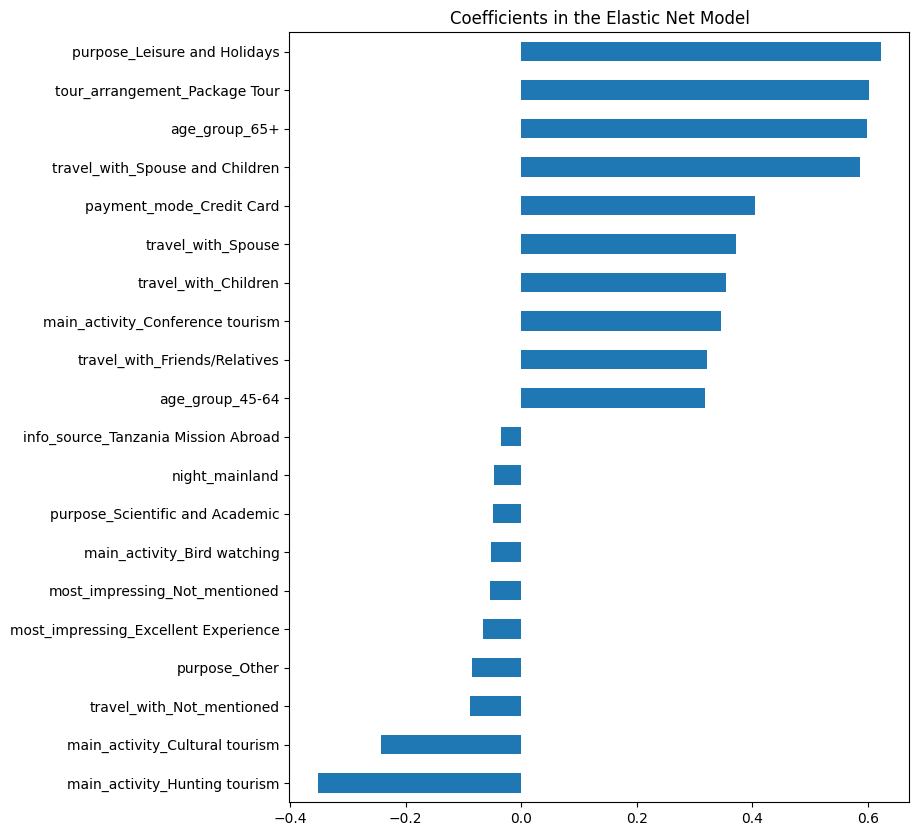

In [103]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Elastic Net Model")

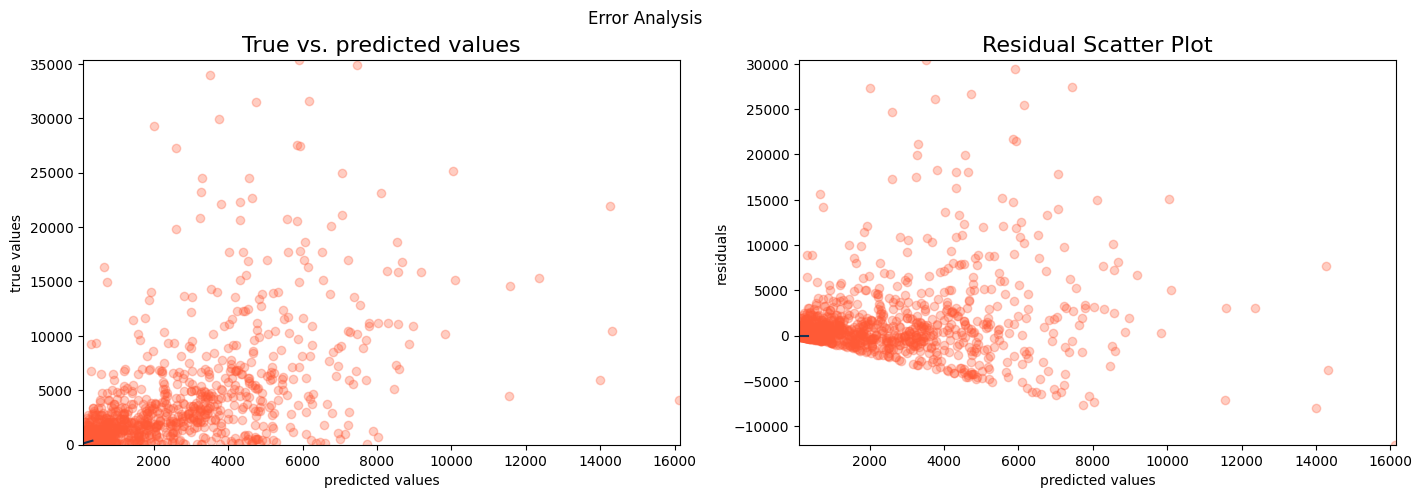

In [104]:
error_analysis(np.exp(y_test), np.exp(pred_test_enet))

result: using the ElasticNet with alpha of 0.005 didn't make our first model better

In [105]:
#trying out with alpha=1
model_enet2 = ElasticNet(l1_ratio=0.2)
model_enet2.fit(X_train_all, y_train) 
pred_train_enet2 = model_enet2.predict(X_train_all)



pred_test_enet2 = model_enet2.predict(X_test_all)


In [106]:
print("Elastic net with l1_ration=0.2:")
print("---"*10)
calculate_metrics(y_train,pred_train_enet2, y_test, pred_test_enet2)

Elastic net with l1_ration=0.2:
------------------------------
Metrics on training data
RMSE: 1.453
RMSE Antilog 4.274197080389323
R2: 0.261
Mean of the y train set 7.03081902917327
Antilog of the mean of the y train set 1130.9565173435292
Mean absolute error 1.1825532262022196
Mean absolute error antilog 3.2626939729841276
------------------------------
Metrics on test data
RMSE: 1.432
RMSE Antilog 4.188955804897892
R2: 0.251
Mean of the y test set 7.017067888715411
Antilog of the mean of the y test set 1115.5110154415581
Mean absolute error 1.1784063247629313
Mean absolute error antilog 3.2491919178468733
------------------------------


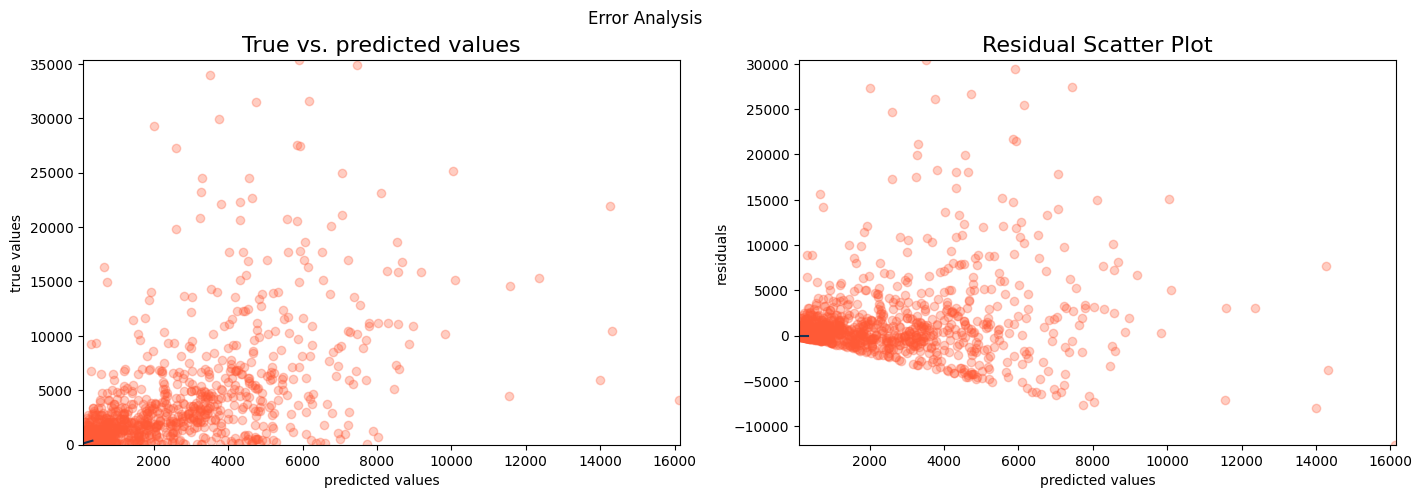

In [107]:
error_analysis(np.exp(y_test), np.exp(pred_test_enet))

In [108]:
coef2 = pd.Series(model_enet2.coef_, index = X_train.columns)
print("Elastic Net picked " + str(sum(coef2 != 0)) + " variables and eliminated the other " +  str(sum(coef2 == 0)) + " variables")

Elastic Net picked 11 variables and eliminated the other 41 variables


In [109]:
imp_coef2 = pd.concat([coef2.sort_values().head(10),
                     coef2.sort_values().tail(10)])

In [110]:
test_set = [[1, 0, 1, 1,1,0, 0, 0, 0, 1, 1, 0, 1, 1,1,0, 0, 0, 0, 1, 1, 0, 1, 1,1,0, 0, 0, 0, 1,1, 0, 1, 1,1,0, 0, 0, 0, 1, 1, 0, 1, 1,1,0, 0, 0, 0, 1, 1,1]]
#test_set = test_set.reshape()
pred_test_enet2 = model_enet2.predict(test_set)
pred_test_enet2


array([7.08069409])

Text(0.5, 1.0, 'Coefficients in the Elastic Net Model')

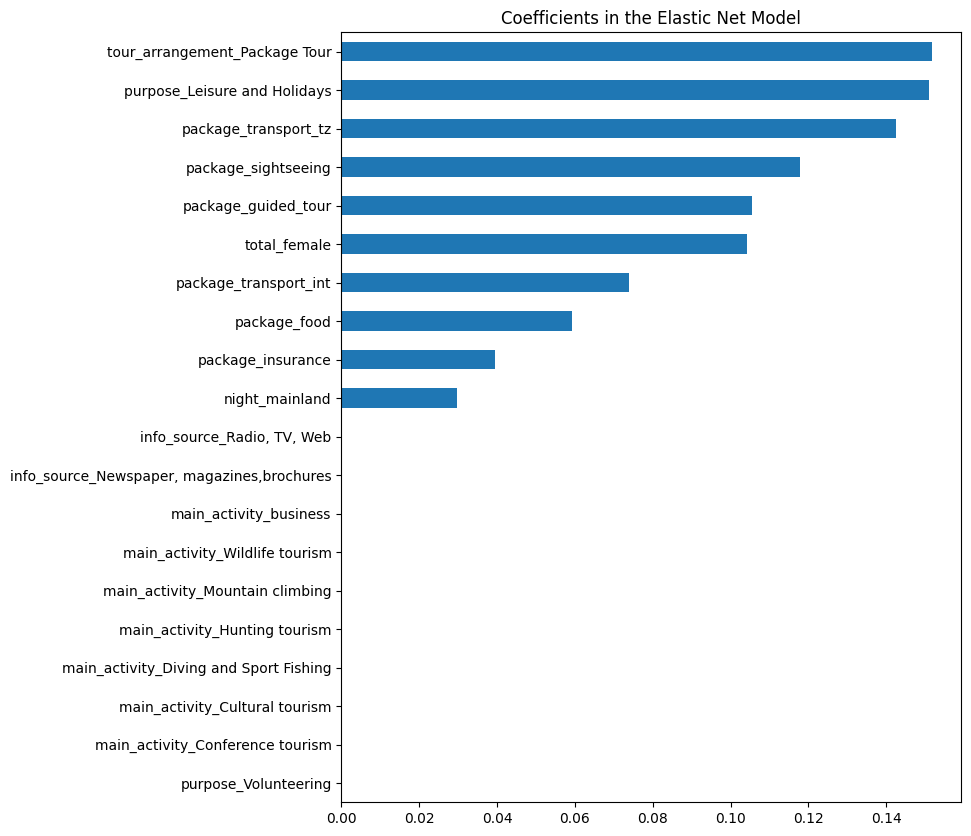

In [111]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef2.plot(kind = "barh")
plt.title("Coefficients in the Elastic Net Model")

result: RMSE Antilog and R squared both increased after changing alpha to default value

### Using cross validation to evaluate our ElasticNet Model

In [112]:
# define model evaluation method
model_enet_new = ElasticNet(alpha=1.0, l1_ratio=0.5)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model_enet_new, X_train_all, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 1.409 (0.042)


In [113]:
#Antilog the RMSE
print("Antilog MAE:", (np.exp(1.409)))

Antilog MAE: 4.091861495962319


In [114]:

model_enet_new.fit(X_train_all, y_train)

# make a prediction
yhat = model_enet_new.predict(X_test_all)
# summarize prediction
#print('Predicted: %.3f' % yhat)

In [115]:
from sklearn.model_selection import GridSearchCV

# grid search hyperparameters for the elastic net
from numpy import arange
#model_e = ElasticNet()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model_enet_new, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train_all, y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

/Users/qurratulain/neuefische/second_project_ml_tansania/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.117e+03, tolerance: 9.219e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/qurratulain/neuefische/second_project_ml_tansania/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.122e+03, tolerance: 9.350e-01 Linear regression models with null weight for the l1 reg

MAE: -0.878
Config: {'alpha': 0.001, 'l1_ratio': 0.81}


Result: still the results don't change a lot after evaluate our ElasticNet Model with cross validation, so our first model and our ElasticNet Model are both almost the same and both very good<br> 
(RMSE train Antilog ElasticNet 5.089006326524787, RMSE test Antilog ElasticNet 4.922688113075679 vs <br>
RMSE train Antilog model1 3.144789044737104, RMSE test Antilog model1 3.2827822899996626)

### Elasticnetcv
Elastic Net model with iterative fitting along a regularization path. The scikit-learn library also provides a built-in version of the algorithm that automatically finds good hyperparameters via the ElasticNetCV class.

To use this class, it is first fit on the dataset, then used to make a prediction. It will automatically find appropriate hyperparameters.

By default, the model will test 100 alpha values and use a default ratio. We can specify our own lists of values to test via the “l1_ratio” and “alphas” arguments, as we did with the manual grid search.

In [116]:
# different cross validation of the ElasticNet Model by using ElasticNetCV

#enet_model = ElasticNet().fit(X_train_all, y_train)

#enet_model.intercept_

#y_pred_enet2 = enet_model.predict(X_test_all)

#np.sqrt(mean_squared_error(y_test,y_pred_enet2))

#r2_score(y_test,y_pred_enet2)

enet_cv_model = ElasticNetCV(cv = 60).fit(X_train_all,y_train)

# If we don't give the lambdas, what's the alpha?

enet_cv_model.alpha_

enet_cv_model.intercept_

enet_cv_model.coef_

# Let's create the final model according to optimum alpha.

enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train_all,y_train)

# Let's now calculate the error for the test set using this final model.

y_pred_enet_tuned = enet_tuned.predict(X_test_all)

print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred_enet_tuned)))
print("Antilog RMSE:", (np.exp(1.184910931545086)))

# summarize chosen configuration
print('alpha: %f' % enet_cv_model.alpha_)
print('l1_ratio_: %f' % enet_cv_model.l1_ratio_)

RMSE: 1.1861917198630667
Antilog RMSE: 3.270395519417361
alpha: 0.001425
l1_ratio_: 0.500000


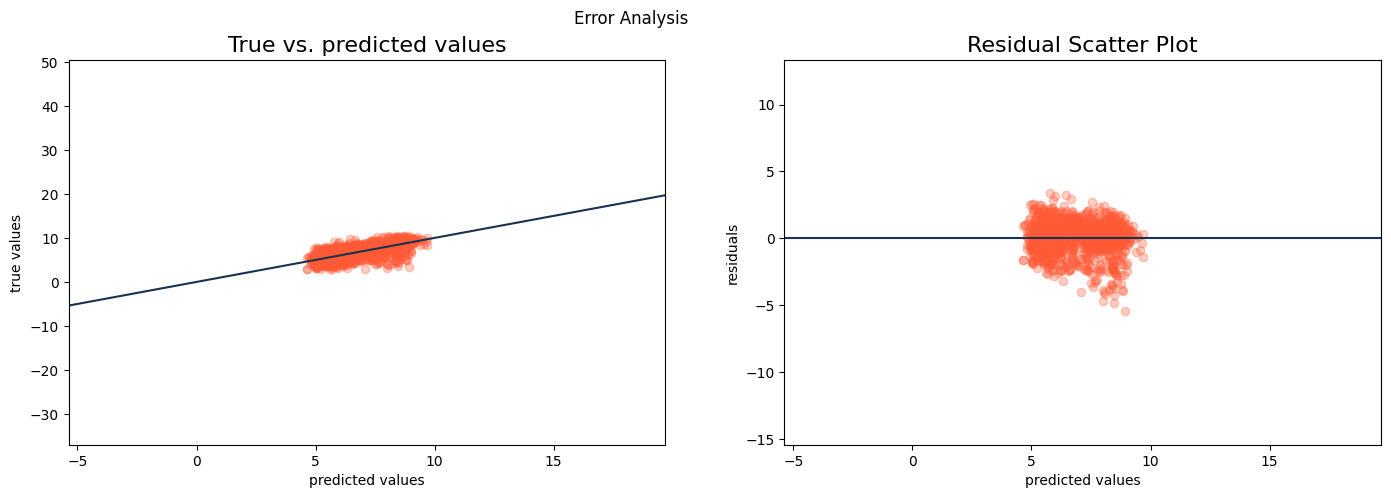

In [117]:
error_analysis(y_test, y_pred_enet_tuned)

The residual plot is one of the most commonly used plots to visualize the regression model's errors. It shows the difference between the actual and predicted values (residuals) plotted against the predicted values.

A good regression model will have residuals randomly scattered around the zero line. If the residuals have a pattern or are not randomly distributed, it indicates that the model is not performing well.

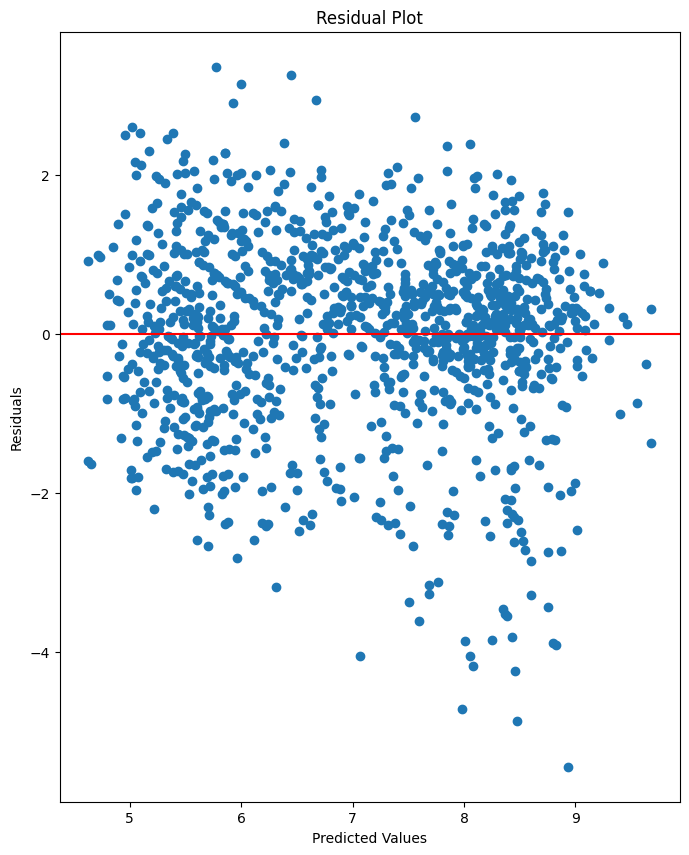

In [118]:
residuals = y_test - y_pred_enet_tuned
plt.scatter(y_pred_enet_tuned, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.show()

The histogram of residuals plot shows the distribution of the residuals. A good regression model will have residuals that follow a normal distribution. If the residuals have a skewed distribution, it indicates that the model is not performing well.

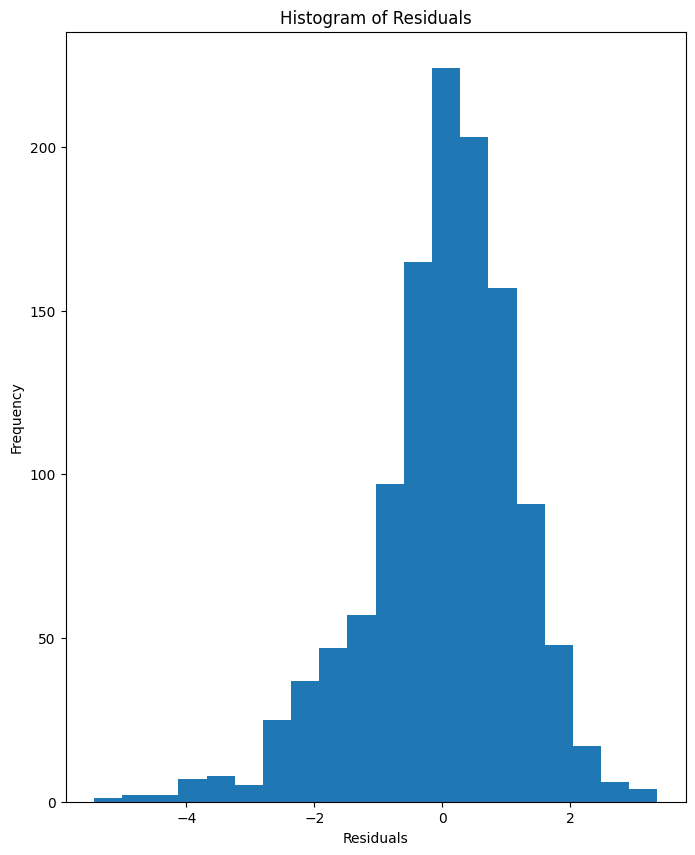

In [119]:
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

The Q-Q (Quantile-Quantile) plot is a probability plot that shows the theoretical quantiles of the residuals against the actual quantiles of the residuals. A good regression model will have residuals that follow a straight line. 
If the points on the plot fall on a straight line, the residuals are normally distributed.
If the points deviate from the straight line, it suggests that the residuals are not normally distributed, and we may need to transform the data or use a different model.

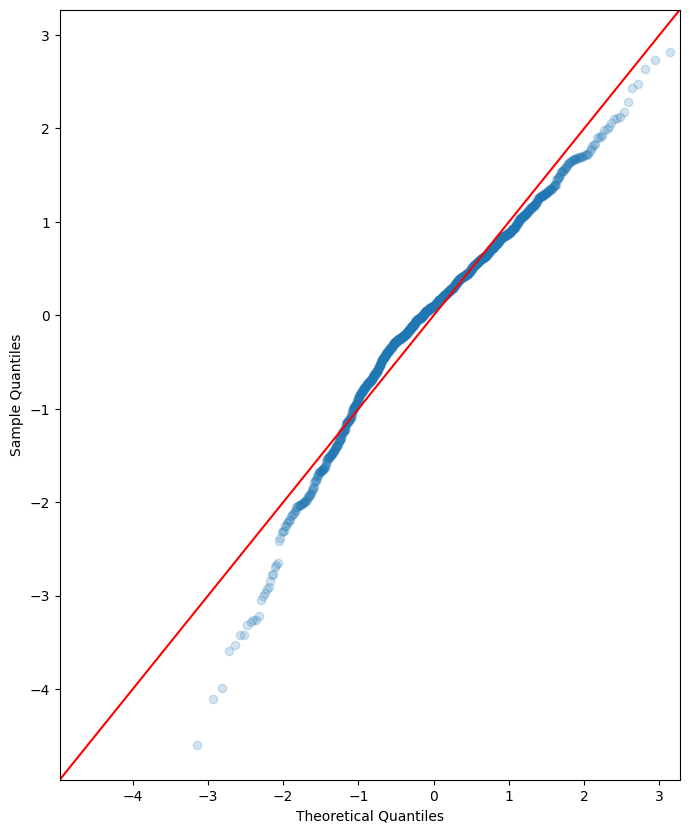

In [120]:
import statsmodels.api as sm

# create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(residuals, fit=True, line="45", alpha=0.2)
plt.show()

Result: after using the ElasicNetCV method for cross validation on our ElasticNet model, the results of the RMSE get better and are the best compared to the others:<br>
RMSE  1.184910931545086, Antilog RMSE: 3.270395519417361<br>

(RMSE train Antilog ElasticNet 5.089006326524787, RMSE test Antilog ElasticNet 4.922688113075679 vs <br>
RMSE train Antilog model1 3.144789044737104, RMSE test Antilog model1 3.2827822899996626)

### Testing the test set from zindi with linear regression

In [121]:
df_test = pd.read_csv('data/Test.csv')
df_test.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing'],
      dtype='object')

In [122]:
#create a list of all the columns which are with categories "yes" and "no" and replace it with 0 and 1
column_list = ['package_transport_int','package_accomodation','package_food', 'package_sightseeing','package_guided_tour', 'package_insurance', 'first_trip_tz', 'package_transport_tz']
df_test[column_list] = df_test[column_list].replace('Yes', 1)
df_test[column_list] = df_test[column_list].replace('No', 0)

In [123]:
df_test.head(10)

ID         country age_group        travel_with  total_female   
0     tour_1       AUSTRALIA     45-64             Spouse           1.0  \
1   tour_100    SOUTH AFRICA     25-44  Friends/Relatives           0.0   
2  tour_1001         GERMANY     25-44  Friends/Relatives           3.0   
3  tour_1006          CANADA    24-Jan  Friends/Relatives           2.0   
4  tour_1009  UNITED KINGDOM     45-64  Friends/Relatives           2.0   
5  tour_1010         DENMARK     25-44                NaN           1.0   
6  tour_1014         GERMANY     45-64                NaN           0.0   
7  tour_1015          RUSSIA    24-Jan              Alone           1.0   
8  tour_1019         GERMANY    24-Jan              Alone           1.0   
9  tour_1020          FRANCE    24-Jan  Friends/Relatives           1.0   

   total_male                         purpose      main_activity   
0         1.0            Leisure and Holidays   Wildlife tourism  \
1         4.0                        Business   Wildlife tourism   
2         0.0            Leisure and Holidays      Beach tourism   
3         0.0            Leisure and Holidays   Cultural tourism   
4         2.0            Leisure and Holidays   Wildlife tourism   
5         0.0                    Volunteering   Cultural tourism   
6         1.0         Meetings and Conference  Mountain climbing   
7         0.0  Visiting Friends and Relatives      Beach tourism   
8         0.0            Leisure and Holidays   Cultural tourism   
9         1.0            Leisure and Holidays   Wildlife tourism   

                      info_source tour_arrangement  package_transport_int   
0    Travel, agent, tour operator     Package Tour                      1  \
1         Tanzania Mission Abroad     Package Tour                      1   
2              Friends, relatives      Independent                      0   
3                          others      Independent                      0   
4              Friends, relatives     Package Tour                      1   
5              Friends, relatives      Independent                      0   
6    Travel, agent, tour operator     Package Tour                      0   
7              Friends, relatives      Independent                      0   
8              Friends, relatives      Independent                      0   
9  Newspaper, magazines,brochures      Independent                      0   

   package_accomodation  package_food  package_transport_tz   
0                     1             1                     1  \
1                     1             0                     0   
2                     0             0                     0   
3                     0             0                     0   
4                     1             1                     1   
5                     0             0                     0   
6                     1             1                     1   
7                     0             0                     0   
8                     0             0                     0   
9                     0             0                     0   

   package_sightseeing  package_guided_tour  package_insurance   
0                    1                    1                  1  \
1                    0                    0                  0   
2                    0                    0                  0   
3                    0                    0                  0   
4                    0                    0                  0   
5                    0                    0                  0   
6                    0                    1                  0   
7                    0                    0                  0   
8                    0                    0                  0   
9                    0                    0                  0   

   night_mainland  night_zanzibar payment_mode  first_trip_tz   
0              10               3         Cash              1  \
1              13               0   

In [124]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1601 non-null   object 
 1   country                1601 non-null   object 
 2   age_group              1601 non-null   object 
 3   travel_with            1274 non-null   object 
 4   total_female           1600 non-null   float64
 5   total_male             1599 non-null   float64
 6   purpose                1601 non-null   object 
 7   main_activity          1601 non-null   object 
 8   info_source            1601 non-null   object 
 9   tour_arrangement       1601 non-null   object 
 10  package_transport_int  1601 non-null   int64  
 11  package_accomodation   1601 non-null   int64  
 12  package_food           1601 non-null   int64  
 13  package_transport_tz   1601 non-null   int64  
 14  package_sightseeing    1601 non-null   int64  
 15  pack

In [125]:
df_test.age_group = df_test.age_group.replace('24-Jan', '1-24')
df_test.age_group.value_counts()

age_group
25-44    866
45-64    447
1-24     202
65+       86
Name: count, dtype: int64

In [126]:
df_test.isnull().sum()

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

In [127]:
df_test = df_test.drop(['ID', 'country'], axis=1)
df_test.columns

Index(['age_group', 'travel_with', 'total_female', 'total_male', 'purpose',
       'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar', 'payment_mode',
       'first_trip_tz', 'most_impressing'],
      dtype='object')

In [128]:
#Change the columns (object) into categorical

category_list2 = ['age_group', 'travel_with', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'payment_mode', 'most_impressing']

df_test[category_list2]= df_test[category_list2].astype('category')

df_test.dtypes


age_group                category
travel_with              category
total_female              float64
total_male                float64
purpose                  category
main_activity            category
info_source              category
tour_arrangement         category
package_transport_int       int64
package_accomodation        int64
package_food                int64
package_transport_tz        int64
package_sightseeing         int64
package_guided_tour         int64
package_insurance           int64
night_mainland              int64
night_zanzibar              int64
payment_mode             category
first_trip_tz               int64
most_impressing          category
dtype: object

In [129]:
df_test = df_test.dropna(how='any',axis=0) 

In [130]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1177 entries, 0 to 1600
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age_group              1177 non-null   category
 1   travel_with            1177 non-null   category
 2   total_female           1177 non-null   float64 
 3   total_male             1177 non-null   float64 
 4   purpose                1177 non-null   category
 5   main_activity          1177 non-null   category
 6   info_source            1177 non-null   category
 7   tour_arrangement       1177 non-null   category
 8   package_transport_int  1177 non-null   int64   
 9   package_accomodation   1177 non-null   int64   
 10  package_food           1177 non-null   int64   
 11  package_transport_tz   1177 non-null   int64   
 12  package_sightseeing    1177 non-null   int64   
 13  package_guided_tour    1177 non-null   int64   
 14  package_insurance      1177 non-null   int64 

In [131]:
#creating dummies for categorical variable
df_test = pd.get_dummies(df_test, drop_first=True, dtype=float)
df_test.head(10)

total_female  total_male  package_transport_int  package_accomodation   
0            1.0         1.0                      1                     1  \
1            0.0         4.0                      1                     1   
2            3.0         0.0                      0                     0   
3            2.0         0.0                      0                     0   
4            2.0         2.0                      1                     1   
7            1.0         0.0                      0                     0   
8            1.0         0.0                      0                     0   
9            1.0         1.0                      0                     0   
10           1.0         1.0                      1                     1   
11           1.0         2.0                      1                     1   

    package_food  package_transport_tz  package_sightseeing   
0              1                     1                    1  \
1              0                     0                    0   
2              0                     0                    0   
3              0                     0                    0   
4              1                     1                    0   
7              0                     0                    0   
8              0                     0                    0   
9              0                     0                    0   
10             1                     1                    0   
11             1                     1                    1   

    package_guided_tour  package_insurance  night_mainland  night_zanzibar   
0                     1                  1              10               3  \
1                     0                  0              13               0   
2                     0                  0               7              14   
3                     0                  0               0               4   
4                     0                  0              10               0   
7                     0                  0              26               3   
8                     0                  0               3               0   
9                     0                  0              30               9   
10                    0                  1               6               4   
11                    1                  0               6               6   

    first_trip_tz  age_group_25-44  age_group_45-64  age_group_65+   
0               1              0.0              1.0            0.0  \
1               0              1.0              0.0            0.0   
2               0              1.0              0.0            0.0   
3               1              0.0              0.0            0.0   
4               1              0.0              1.0            0.0   
7               0              0.0              0.0            0.0   
8               0              0.0              0.0            0.0   
9               1              0.0              0.0            0.0   
10              1              1.0              0.0            0.0   
11              1              1.0              0.0            0.0   

    travel_with_Children  travel_with_Friends/Relatives  travel_with_Spouse   
0                    0.0                            0.0                 1.0  \
1                    0.0                            1.0                 0.0   
2                    0.0                            1.0                 0.0   
3                    0.0                            1.0                 0.0   
4                    0.0                            1.0                 0.0   
7                    0.0                            0.0                 0.0   
8                    0.0                            0.0                 0.0   
9                    0.0                            1.0                 0.0   
10                   0.0                            0.0                 1.0   
11                   0.0                  

In [132]:
df_test.columns

Index(['total_female', 'total_male', 'package_transport_int',
       'package_accomodation', 'package_food', 'package_transport_tz',
       'package_sightseeing', 'package_guided_tour', 'package_insurance',
       'night_mainland', 'night_zanzibar', 'first_trip_tz', 'age_group_25-44',
       'age_group_45-64', 'age_group_65+', 'travel_with_Children',
       'travel_with_Friends/Relatives', 'travel_with_Spouse',
       'travel_with_Spouse and Children', 'purpose_Leisure and Holidays',
       'purpose_Meetings and Conference', 'purpose_Other',
       'purpose_Scientific and Academic',
       'purpose_Visiting Friends and Relatives', 'purpose_Volunteering',
       'main_activity_Bird watching', 'main_activity_Conference tourism',
       'main_activity_Cultural tourism',
       'main_activity_Diving and Sport Fishing',
       'main_activity_Hunting tourism', 'main_activity_Mountain climbing',
       'main_activity_Wildlife tourism', 'main_activity_business',
       'info_source_Newspaper, 

In [133]:
df_test.insert(loc = 47,
          column = 'most_impressing_Not_mentioned',
          value = 0)

In [134]:
df_clean.columns

Index(['total_female', 'total_male', 'package_transport_int',
       'package_accomodation', 'package_food', 'package_transport_tz',
       'package_sightseeing', 'package_guided_tour', 'package_insurance',
       'night_mainland', 'night_zanzibar', 'first_trip_tz', 'total_cost_usd',
       'age_group_25-44', 'age_group_45-64', 'age_group_65+',
       'travel_with_Children', 'travel_with_Friends/Relatives',
       'travel_with_Not_mentioned', 'travel_with_Spouse',
       'travel_with_Spouse and Children', 'purpose_Leisure and Holidays',
       'purpose_Meetings and Conference', 'purpose_Other',
       'purpose_Scientific and Academic',
       'purpose_Visiting Friends and Relatives', 'purpose_Volunteering',
       'main_activity_Bird watching', 'main_activity_Conference tourism',
       'main_activity_Cultural tourism',
       'main_activity_Diving and Sport Fishing',
       'main_activity_Hunting tourism', 'main_activity_Mountain climbing',
       'main_activity_Wildlife tourism', 'ma

In [135]:
df_clean.columns.isin(df_test.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [136]:
scaler2 = MinMaxScaler()
col_scale = ['total_female', 'total_male', 'night_zanzibar', 'night_mainland']
X_test_scaled = scaler2.fit_transform(df_test[col_scale]) # why not y_train?
X_test_scaled = scaler2.transform(df_test[col_scale])
# It follows the same syntax as the StandardScaler.
# Don't forget: you have to import the scaler at the top of your notebook. 
#X_test_zindi = np.concatenate([X_train_scaled2, X_train.drop(col_scale, axis=1)], axis=1)
X_test_zindi = np.concatenate([X_test_scaled, df_test.drop(col_scale, axis=1)], axis=1)

In [137]:
X_test_zindi.shape

(1177, 51)

In [1]:
#y_pred_zindi = lin_reg.predict(X_test_zindi)

In [ ]:
y_train[:1177]

3075     6.521475
2915     8.226215
2304     6.948043
1196     5.631678
620      6.090676
1215     8.853611
2700     7.788415
1189     7.309922
328      6.521475
3082     8.219434
897      7.759840
2655     4.980520
1123     7.704645
3942     7.336533
4467     4.898362
1614     8.872843
1590     7.664520
3592     7.052098
4740     6.521475
3262     4.372481
2024     4.244200
2970    10.360920
3916     7.164945
1235     8.438390
3654     8.170126
809      8.762177
978      9.222829
1745     7.309922
3669     6.966665
1714     6.744613
2707     6.142489
3648     9.699521
3317     8.329757
1322     7.829801
4030     6.521475
4353     4.706824
174      5.443888
1569     5.317483
3745     6.292051
3966     8.314893
2177     4.158258
217      6.497182
3641     8.136887
4382     4.629863
690      9.007956
2414     6.959721
3893     6.015620
2099     5.135151
1106     5.631678
4271     6.010630
2619     6.709304
2771     6.926930
1862     4.637831
3026     8.038790
4780     6.521475
576      5

In [ ]:
np.sqrt(mean_squared_error(y_train[:1177], y_pred_zindi))

2.073358828773093

In [ ]:
np.exp(y_pred_zindi.mean())

1495.0186897540145